In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pylab as pl
import matplotlib.patheffects as pe

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [2]:
def readColumnsFromFile(filename):
    '''reads in the raw data and returns a list of lists.
    the first list (returned[0]) is the x-coords. '''
    with open(filename) as infile:
        reader = csv.reader(infile, delimiter=" ")
        row_array = []
        
        for row in reader:
            row_data = [col.strip() for col in row]          
            row_array.append(row_data)
            
        #converts rows to columns and removes the last item in the columns list which is just spaces
        #this is an atrifact of the file printing system
        #also has zip output in lists not tuples
        col_array = [list(a) for a in zip(*row_array)]
        del col_array[-1]
        #convert list of lists of strings to list of lists of floats
        #return list([[float(j) for j in i] for i in col_array])
        return np.array([[float(j) for j in i] for i in col_array])

In [3]:
#FGTA simple MIC curves no death
FGTA_simple_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
FGTA_simple_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
FGTA_simple_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
FGTA_simple_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

FGTA_simple_c_05_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=0.5-spatialDistribution-FINAL.txt')
FGTA_simple_c_05_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=0.5-gRateDistribution-FINAL.txt')
FGTA_simple_c_1_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=1.0-spatialDistribution-FINAL.txt')
FGTA_simple_c_1_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=1.0-gRateDistribution-FINAL.txt')
FGTA_simple_c_2_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-c=2.0-spatialDistribution-FINAL.txt')
FGTA_simple_c_2_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')


#SGTA simple MIC curves no death
SGTA_simple_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
SGTA_simple_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
SGTA_simple_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
SGTA_simple_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

SGTA_simple_c_05_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=0.5-spatialDistribution-FINAL.txt')
SGTA_simple_c_05_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=0.5-gRateDistribution-FINAL.txt')
SGTA_simple_c_1_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=1.0-spatialDistribution-FINAL.txt')
SGTA_simple_c_1_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=1.0-gRateDistribution-FINAL.txt')
SGTA_simple_c_2_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-c=2.0-spatialDistribution-FINAL.txt')
SGTA_simple_c_2_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')


#GITA (growth rate independent - flat mic) simple MIC curves no death
GITA_simple_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
GITA_simple_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
GITA_simple_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
GITA_simple_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.02-gRateDistribution-FINAL.txt')


#Realistic growth curves
FGTA_realistic_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-fastGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
FGTA_realistic_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-fastGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
FGTA_realistic_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-fastGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
FGTA_realistic_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

SGTA_realistic_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-slowGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
SGTA_realistic_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-slowGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
SGTA_realistic_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-slowGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
SGTA_realistic_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/realistic_growth_curves/realistic-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')


#Realistic beta-swapped curves
FGTA_realistic_BS_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-fastGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
FGTA_realistic_BS_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-fastGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
FGTA_realistic_BS_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-fastGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
FGTA_realistic_BS_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

SGTA_realistic_BS_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-slowGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
SGTA_realistic_BS_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-slowGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
SGTA_realistic_BS_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-slowGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
SGTA_realistic_BS_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/realistic_betaSwapped_growth_curves/realistic_betaSwapped-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')



#With death
FGTA_wDeath_alpha_specificAlpha_aliveSpatial = readColumnsFromFile('MasterPlotFolder/with_death/fastGrowers_death-alpha=0.004884694070738408-aliveSpatialDistribution-FINAL.txt')
FGTA_wDeath_alpha_specificAlpha_deadSpatial = readColumnsFromFile('MasterPlotFolder/with_death/fastGrowers_death-alpha=0.004884694070738408-deadSpatialDistribution-FINAL.txt')
FGTA_wDeath_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/with_death/fastGrowers_death-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')

SGTA_wDeath_alpha_specificAlpha_aliveSpatial = readColumnsFromFile('MasterPlotFolder/with_death/slowGrowers_death-alpha=0.004884694070738408-aliveSpatialDistribution-FINAL.txt')
SGTA_wDeath_alpha_specificAlpha_deadSpatial = readColumnsFromFile('MasterPlotFolder/with_death/slowGrowers_death-alpha=0.004884694070738408-deadSpatialDistribution-FINAL.txt')
SGTA_wDeath_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/with_death/slowGrowers_death-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')

#######################################################
# uniform c
#spatial
FGTA_const_c_02_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=0.2-spatialDistribution-FINAL.txt')
FGTA_const_c_05_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=0.5-spatialDistribution-FINAL.txt')
FGTA_const_c_08_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=0.8-spatialDistribution-FINAL.txt')
FGTA_const_c_1_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=1.0-spatialDistribution-FINAL.txt')
FGTA_const_c_2_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=2.0-spatialDistribution-FINAL.txt')
FGTA_const_c_3_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=3.0-spatialDistribution-FINAL.txt')
FGTA_const_c_4_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=4.0-spatialDistribution-FINAL.txt')
FGTA_const_c_5_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=5.0-spatialDistribution-FINAL.txt')
FGTA_const_c_6_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=6.0-spatialDistribution-FINAL.txt')
FGTA_const_c_8_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=8.0-spatialDistribution-FINAL.txt')
FGTA_const_c_10_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=10.0-spatialDistribution-FINAL.txt')

GITA_const_c_02_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=0.2-spatialDistribution-FINAL.txt')
GITA_const_c_05_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=0.5-spatialDistribution-FINAL.txt')
GITA_const_c_08_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=0.8-spatialDistribution-FINAL.txt')
GITA_const_c_1_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=1.0-spatialDistribution-FINAL.txt')
GITA_const_c_2_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=2.0-spatialDistribution-FINAL.txt')
GITA_const_c_3_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=3.0-spatialDistribution-FINAL.txt')
GITA_const_c_4_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=4.0-spatialDistribution-FINAL.txt')
GITA_const_c_5_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=5.0-spatialDistribution-FINAL.txt')
GITA_const_c_6_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=6.0-spatialDistribution-FINAL.txt')
GITA_const_c_8_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=8.0-spatialDistribution-FINAL.txt')
GITA_const_c_10_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=10.0-spatialDistribution-FINAL.txt')

SGTA_const_c_02_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=0.2-spatialDistribution-FINAL.txt')
SGTA_const_c_05_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=0.5-spatialDistribution-FINAL.txt')
SGTA_const_c_08_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=0.8-spatialDistribution-FINAL.txt')
SGTA_const_c_1_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=1.0-spatialDistribution-FINAL.txt')
SGTA_const_c_2_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=2.0-spatialDistribution-FINAL.txt')
SGTA_const_c_3_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=3.0-spatialDistribution-FINAL.txt')
SGTA_const_c_4_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=4.0-spatialDistribution-FINAL.txt')
SGTA_const_c_5_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=5.0-spatialDistribution-FINAL.txt')
SGTA_const_c_6_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=6.0-spatialDistribution-FINAL.txt')
SGTA_const_c_8_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=8.0-spatialDistribution-FINAL.txt')
SGTA_const_c_10_spatial = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=10.0-spatialDistribution-FINAL.txt')


# gRate
FGTA_const_c_02_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=0.2-gRateDistribution-FINAL.txt')
FGTA_const_c_05_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=0.5-gRateDistribution-FINAL.txt')
FGTA_const_c_08_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=0.8-gRateDistribution-FINAL.txt')
FGTA_const_c_1_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=1.0-gRateDistribution-FINAL.txt')
FGTA_const_c_2_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=2.0-gRateDistribution-FINAL.txt')
FGTA_const_c_3_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=3.0-gRateDistribution-FINAL.txt')
FGTA_const_c_4_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=4.0-gRateDistribution-FINAL.txt')
FGTA_const_c_5_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=5.0-gRateDistribution-FINAL.txt')
FGTA_const_c_6_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=6.0-gRateDistribution-FINAL.txt')
FGTA_const_c_8_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=8.0-gRateDistribution-FINAL.txt')
FGTA_const_c_10_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-fastGrowers-c=10.0-gRateDistribution-FINAL.txt')

GITA_const_c_02_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=0.2-gRateDistribution-FINAL.txt')
GITA_const_c_05_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=0.5-gRateDistribution-FINAL.txt')
GITA_const_c_08_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=0.8-gRateDistribution-FINAL.txt')
GITA_const_c_1_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=1.0-gRateDistribution-FINAL.txt')
GITA_const_c_2_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=2.0-gRateDistribution-FINAL.txt')
GITA_const_c_3_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=3.0-gRateDistribution-FINAL.txt')
GITA_const_c_4_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=4.0-gRateDistribution-FINAL.txt')
GITA_const_c_5_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=5.0-gRateDistribution-FINAL.txt')
GITA_const_c_6_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=6.0-gRateDistribution-FINAL.txt')
GITA_const_c_8_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=8.0-gRateDistribution-FINAL.txt')
GITA_const_c_10_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-flatGrowers-c=10.0-gRateDistribution-FINAL.txt')


SGTA_const_c_02_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=0.2-gRateDistribution-FINAL.txt')
SGTA_const_c_05_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=0.5-gRateDistribution-FINAL.txt')
SGTA_const_c_08_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=0.8-gRateDistribution-FINAL.txt')
SGTA_const_c_1_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=1.0-gRateDistribution-FINAL.txt')
SGTA_const_c_2_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=2.0-gRateDistribution-FINAL.txt')
SGTA_const_c_3_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=3.0-gRateDistribution-FINAL.txt')
SGTA_const_c_4_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=4.0-gRateDistribution-FINAL.txt')
SGTA_const_c_5_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=5.0-gRateDistribution-FINAL.txt')
SGTA_const_c_6_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=6.0-gRateDistribution-FINAL.txt')
SGTA_const_c_8_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=8.0-gRateDistribution-FINAL.txt')
SGTA_const_c_10_gRate = readColumnsFromFile('MasterPlotFolder/uniform_concentration/simple-slowGrowers-c=10.0-gRateDistribution-FINAL.txt')


uniform_FGTA_spatial_list = [FGTA_const_c_02_spatial, FGTA_const_c_05_spatial, FGTA_const_c_08_spatial, FGTA_const_c_1_spatial, FGTA_const_c_2_spatial, FGTA_const_c_3_spatial, FGTA_const_c_4_spatial, FGTA_const_c_5_spatial, FGTA_const_c_6_spatial, FGTA_const_c_8_spatial, FGTA_const_c_10_spatial]
uniform_GITA_spatial_list = [GITA_const_c_02_spatial, GITA_const_c_05_spatial, GITA_const_c_08_spatial, GITA_const_c_1_spatial, GITA_const_c_2_spatial, GITA_const_c_3_spatial, GITA_const_c_4_spatial, GITA_const_c_5_spatial, GITA_const_c_6_spatial, GITA_const_c_8_spatial, GITA_const_c_10_spatial]
uniform_SGTA_spatial_list = [SGTA_const_c_02_spatial, SGTA_const_c_05_spatial, SGTA_const_c_08_spatial, SGTA_const_c_1_spatial, SGTA_const_c_2_spatial, SGTA_const_c_3_spatial, SGTA_const_c_4_spatial, SGTA_const_c_5_spatial, SGTA_const_c_6_spatial, SGTA_const_c_8_spatial, SGTA_const_c_10_spatial]

uniform_FGTA_gRate_list = [FGTA_const_c_02_gRate, FGTA_const_c_05_gRate, FGTA_const_c_08_gRate, FGTA_const_c_1_gRate, FGTA_const_c_2_gRate, FGTA_const_c_3_gRate, FGTA_const_c_4_gRate, FGTA_const_c_5_gRate, FGTA_const_c_6_gRate, FGTA_const_c_8_gRate, FGTA_const_c_10_gRate]
uniform_GITA_gRate_list = [GITA_const_c_02_gRate, GITA_const_c_05_gRate, GITA_const_c_08_gRate, GITA_const_c_1_gRate, GITA_const_c_2_gRate, GITA_const_c_3_gRate, GITA_const_c_4_gRate, GITA_const_c_5_gRate, GITA_const_c_6_gRate, GITA_const_c_8_gRate, GITA_const_c_10_gRate]
uniform_SGTA_gRate_list = [SGTA_const_c_02_gRate, SGTA_const_c_05_gRate, SGTA_const_c_08_gRate, SGTA_const_c_1_gRate, SGTA_const_c_2_gRate, SGTA_const_c_3_gRate, SGTA_const_c_4_gRate, SGTA_const_c_5_gRate, SGTA_const_c_6_gRate, SGTA_const_c_8_gRate, SGTA_const_c_10_gRate]

##################################################################################################
#continuum model
FGTA_continuum_aliveSpatial = readColumnsFromFile('MasterPlotFolder/continuum_model/FGTA_death-alpha=4.884694070738408E-4-aliveDistribution-continuum.txt')
FGTA_continuum_deadSpatial = readColumnsFromFile('MasterPlotFolder/continuum_model/FGTA_death-alpha=4.884694070738408E-4-deadDistribution-continuum.txt')
FGTA_continuum_gRate = readColumnsFromFile('MasterPlotFolder/continuum_model/FGTA_death-alpha=4.884694070738408E-4-gRateDistribution-continuum.txt')

SGTA_continuum_aliveSpatial = readColumnsFromFile('MasterPlotFolder/continuum_model/SGTA_death-alpha=4.884694070738408E-4-aliveDistribution-continuum.txt')
SGTA_continuum_deadSpatial = readColumnsFromFile('MasterPlotFolder/continuum_model/SGTA_death-alpha=4.884694070738408E-4-deadDistribution-continuum.txt')
SGTA_continuum_gRate = readColumnsFromFile('MasterPlotFolder/continuum_model/SGTA_death-alpha=4.884694070738408E-4-gRateDistribution-continuum.txt')

FGTA_continuum_aliveSpatialNoisy = readColumnsFromFile('MasterPlotFolder/continuum_model/FGTA_death-alpha=4.884694070738408E-4-aliveDistribution-continuum-NOISY.txt')
FGTA_continuum_deadSpatialNoisy = readColumnsFromFile('MasterPlotFolder/continuum_model/FGTA_death-alpha=4.884694070738408E-4-deadDistribution-continuum-NOISY.txt')
FGTA_continuum_gRateNoisy = readColumnsFromFile('MasterPlotFolder/continuum_model/FGTA_death-alpha=4.884694070738408E-4-gRateDistribution-continuum-NOISY.txt')

SGTA_continuum_aliveSpatialNoisy = readColumnsFromFile('MasterPlotFolder/continuum_model/SGTA_death-alpha=4.884694070738408E-4-aliveDistribution-continuum-NOISY.txt')
SGTA_continuum_deadSpatialNoisy = readColumnsFromFile('MasterPlotFolder/continuum_model/SGTA_death-alpha=4.884694070738408E-4-deadDistribution-continuum-NOISY.txt')
SGTA_continuum_gRateNoisy = readColumnsFromFile('MasterPlotFolder/continuum_model/SGTA_death-alpha=4.884694070738408E-4-gRateDistribution-continuum-NOISY.txt')

#############################################################################################################
#non-linear beta
FGTA_nonLinBeta_spatial = readColumnsFromFile('MasterPlotFolder/non-linear-beta/FGTA-nonLinearBeta-alpha=0.004884694070738408-spatialDistribution.txt')
FGTA_nonLinBeta_gRate = readColumnsFromFile('MasterPlotFolder/non-linear-beta/FGTA-nonLinearBeta-alpha=0.004884694070738408-gRateDistribution.txt')
FGTA_linBeta_spatial = readColumnsFromFile('MasterPlotFolder/non-linear-beta/FGTA-regularBeta-alpha=0.004884694070738408-spatialDistribution.txt')
FGTA_linBeta_gRate = readColumnsFromFile('MasterPlotFolder/non-linear-beta/FGTA-regularBeta-alpha=0.004884694070738408-gRateDistribution.txt')

SGTA_nonLinBeta_spatial = readColumnsFromFile('MasterPlotFolder/non-linear-beta/SGTA-nonLinearBeta-alpha=0.004884694070738408-spatialDistribution.txt')
SGTA_nonLinBeta_gRate = readColumnsFromFile('MasterPlotFolder/non-linear-beta/SGTA-nonLinearBeta-alpha=0.004884694070738408-gRateDistribution.txt')
SGTA_linBeta_spatial = readColumnsFromFile('MasterPlotFolder/non-linear-beta/SGTA-regularBeta-alpha=0.004884694070738408-spatialDistribution.txt')
SGTA_linBeta_gRate = readColumnsFromFile('MasterPlotFolder/non-linear-beta/SGTA-regularBeta-alpha=0.004884694070738408-gRateDistribution.txt')



In [4]:
def getExponentialAntibioticConcentrations(alpha, xData):
    '''returns the exponential antiiotic gradients for a given alpha'''
    cData = []
    for x in xData:
        cData.append(math.exp(alpha*x) - 1.)
    return cData

In [5]:
def getWavefrontPositionsVsT(data1, data2, data3):
    
    popThreshold = 20.
    t = [i for i in np.linspace(0., 2000., 21)]
    data1_wavefronts = []
    data2_wavefronts = []
    data3_wavefronts = []
    
    #here we iterate over the input data and get the max indices of the data where the population
    #is above a certain threshold. this gives us the wavefron position over time
    for i in range(1, len(data1)):
        data1_wavefronts.append(max((x, y) for x, y in enumerate(data1[i]) if y > popThreshold)[0])
        data2_wavefronts.append(max((x, y) for x, y in enumerate(data2[i]) if y > popThreshold)[0])
        data3_wavefronts.append(max((x, y) for x, y in enumerate(data3[i]) if y > popThreshold)[0])
    
    return data1_wavefronts, data2_wavefronts, data3_wavefronts, t

In [6]:
def getPercentAliveAndPopSizeOverTime(liveData, deadData):
    '''method to get the lists of percentage of the population alive and population size 
    over time for the death antibiotics'''
    pc_alive_t = []
    size_of_pop_t = []
    t = [i for i in np.linspace(0., 2000., 21)]
    
    for live_pop, dead_pop in zip(liveData[1:], deadData[1:]):
        
        num_alive = sum(live_pop)
        num_dead = sum(dead_pop)
        
        size_of_pop_t.append(num_alive+num_dead)
        pc_alive_t.append((num_alive/(num_alive+num_dead))*100.)
        
    return pc_alive_t, size_of_pop_t

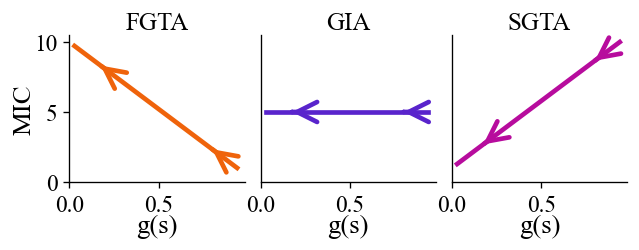

In [7]:
def add_arrow(line, position=None, direction='right', size=15, color=None, lineWidth=10):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color, linewidth=lineWidth),
        size=size
    )


def plotSeparatedBetasOverTime():
    
    #fig = plt.figure(dpi=300)
    fig = plt.figure(dpi=120)
    fig.set_size_inches(6,2)
    gs = gridspec.GridSpec(nrows=100, ncols=6)
    plt.gcf().subplots_adjust(bottom=0.2)
    
    ax11 = fig.add_subplot(gs[:90, :2])
    ax12 = fig.add_subplot(gs[:90, 2:4], sharey=ax11)
    ax13 = fig.add_subplot(gs[:90, 4:], sharey=ax11)
    
    allAxArr = [ax11, ax12, ax13]
    
    K = 33.
    S_max = 500
    mu_max = S_max/(K + S_max)
    
    S = list(range(500, 0, -1))
    mu = [x/y for x, y in zip(S, [K+s for s in S])]
    #print(mu)
    betaFGTA = [10. - 9.*m/mu_max for m in mu]
    betaGITA = [5 for m in mu]
    betaSGTA = [1. + 9.*m/mu_max for m in mu]
    
    lineWidth = 2.8
    FGTA_color = '#ef630b'
    GITA_color = '#5924cc'
    SGTA_color = '#b70c9d'
    titleSize = 15
    labelSize = 16
    numbersize = 14
    legendsize = 9
    IDsize=17
    
    
    lineFGTA = ax11.plot(mu, betaFGTA, label = 'FGTA', linewidth=lineWidth, color=FGTA_color)[0]
    lineGITA = ax12.plot(mu, betaGITA, label = 'GIA', linewidth=lineWidth, color=GITA_color)[0]
    lineSGTA = ax13.plot(mu, betaSGTA, label = 'SGTA', linewidth=lineWidth, color=SGTA_color)[0]
    add_arrow(lineFGTA, position=0.2, size=30, lineWidth=lineWidth)
    add_arrow(lineGITA, position=0.2, size=30, lineWidth=lineWidth)
    add_arrow(lineSGTA, position=0.2, size=30, lineWidth=lineWidth)
    add_arrow(lineFGTA, position=0.8, size=30, lineWidth=lineWidth)
    add_arrow(lineGITA, position=0.8, size=30, lineWidth=lineWidth)
    add_arrow(lineSGTA, position=0.8, size=30, lineWidth=lineWidth)
    
    
    plt.setp(ax12.get_yticklabels(), visible=False)
    plt.setp(ax12.get_yticklines(), visible=False)
    plt.setp(ax13.get_yticklabels(), visible=False)
    plt.setp(ax13.get_yticklines(), visible=False)
    
    font_size=10
    ax11.set_ylabel('MIC', fontsize=labelSize, labelpad=-1)
    ax11.set_xlabel('g(s)', fontsize=labelSize, labelpad=-1)
    ax12.set_xlabel('g(s)', fontsize=labelSize, labelpad=-1)
    ax13.set_xlabel('g(s)', fontsize=labelSize, labelpad=-1)
    
    ax11.set_title('FGTA', fontsize=titleSize, pad=-1)
    ax12.set_title('GIA', fontsize=titleSize, pad=-1)
    ax13.set_title('SGTA', fontsize=titleSize, pad=-1)
    
    for ax in allAxArr:
        ax.set_xlim(0., 0.98)
        ax.set_ylim(0, 10.5)
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
    plt.savefig('Paper_figures/seperated_betas_over_time-FINAL.pdf', bbox_inches='tight', dpi=330)
    
    
plotSeparatedBetasOverTime()
    

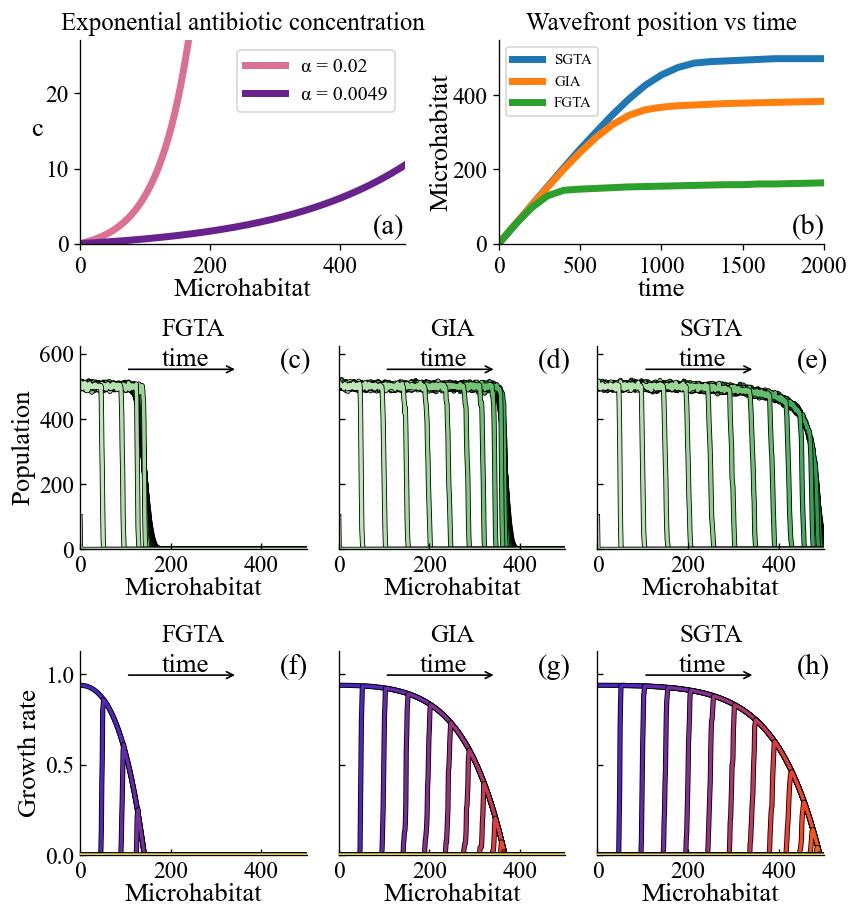

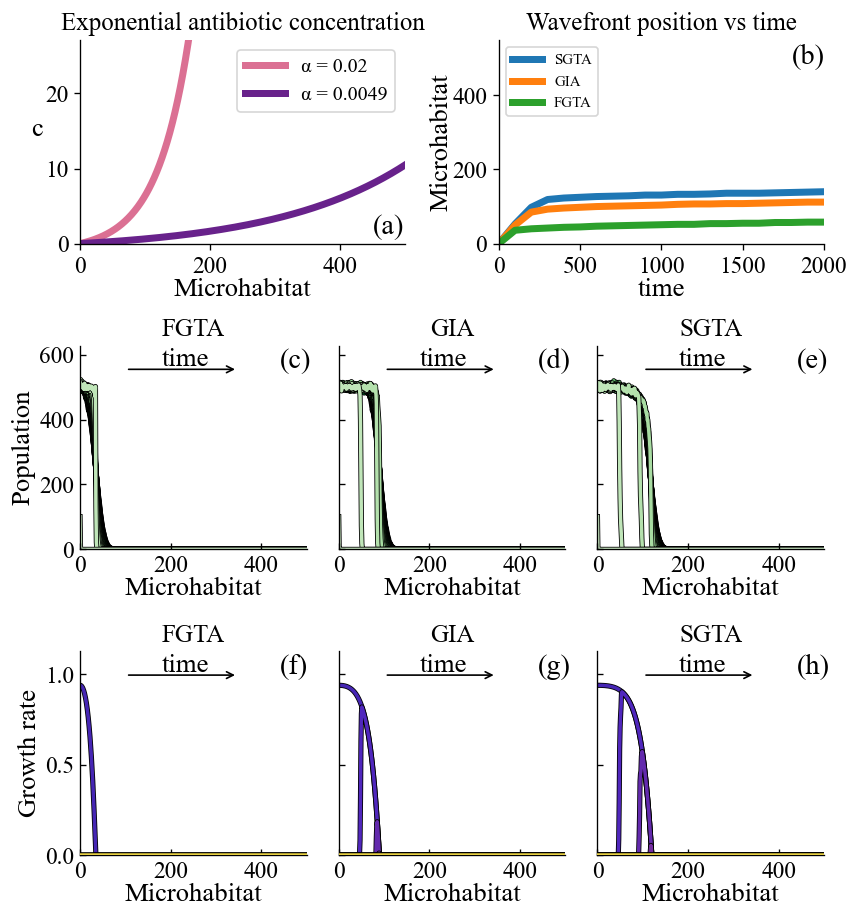

In [31]:
def fig3_distbs_wavfronPos_grad(FGTA_spat, GITA_spat, SGTA_spat, FGTA_gRate, GITA_gRate, SGTA_gRate, filename):
    '''this is the big method to make figure 3? which has the pop and gRate distbs for the simple 
    growth curves, specific alpha, no death. also has '''
    
    # max and min values of population and gRate distributions, used for fine tuning graphs
    max_value_Pops = max(np.amax(FGTA_spat[1:]), np.amax(GITA_spat[1:]), np.amax(SGTA_spat[1:]))
    min_value_Pops = min(np.amin(FGTA_spat[1:]), np.amin(GITA_spat[1:]), np.amin(SGTA_spat[1:]))
    max_value_gRate = max(np.amax(FGTA_gRate[1:]), np.amax(GITA_gRate[1:]), np.amax(SGTA_gRate[1:]))
    min_value_gRate = min(np.amin(FGTA_gRate[1:]), np.amin(GITA_gRate[1:]), np.amin(SGTA_gRate[1:]))
    max_value_X = max(np.amax(FGTA_spat[0]), np.amax(GITA_spat[0]), np.amax(SGTA_spat[0]))
    
    # accent line colours for spatial and gRates
    linColour_spat = '#00b300'
    linColour_gRate = '#009999'
    
    # size and quality of the image
    #fig = plt.figure(figsize=(14, 12), dpi=400)
    fig = plt.figure(dpi=120)
    #plt.subplots_adjust(hspace=0.5, wspace=0.24)
    fig.set_size_inches(8,9)
    
    
    #use this to adjust the individual no. of gridspecs involved
    gs0 = gridspec.GridSpec(nrows=3, ncols=1, hspace=0.5)
    
    # here the individual subfigures are adjusted and spacing sorted out
    # this is the plots of wavefront position and antibiotic gradient
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=100, subplot_spec=gs0[0], wspace=1.)
    ax11 = fig.add_subplot(gs00[0, :44])
    ax12 = fig.add_subplot(gs00[0, 56:])
    
    #this is the population distributions over time
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[1], wspace=0.33)
    ax21 = fig.add_subplot(gs01[0, :2])
    ax22 = fig.add_subplot(gs01[0, 2:4], sharey=ax21)
    ax23 = fig.add_subplot(gs01[0, 4:], sharey=ax21)
    
    # this is the gRate distributions over time
    gs02 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[2], wspace=0.33)
    ax31 = fig.add_subplot(gs02[0, :2])
    ax32 = fig.add_subplot(gs02[0, 2:4], sharey=ax31)
    ax33 = fig.add_subplot(gs02[0, 4:], sharey=ax31)
    
    # combine all the axes into lists
    spatAxArr = [ax21, ax22, ax23]
    gRateAxArr = [ax31, ax32, ax33]
    allAxArr = [ax11, ax12, ax21, ax22, ax23, ax31, ax32, ax33]
    
    # here the data is added to the plots
    lineWidthThicc = 4.2
    lineWidth = 2.1
    #this is the exponential gradient comparisons
    cExp_specAlpha = getExponentialAntibioticConcentrations(alpha=0.004884694070738408, xData=FGTA_spat[0])
    cExp_002 = getExponentialAntibioticConcentrations(alpha=0.02, xData=FGTA_spat[0])
    
    ax11.plot(FGTA_spat[0], cExp_002, linewidth=lineWidthThicc, color='#DB7093', label='α = 0.02')
    ax11.plot(FGTA_spat[0], cExp_specAlpha, linewidth=lineWidthThicc, color='#68228B', label='α = 0.0049')
    
    
    # this is the wavefront vs time section. firstly the wavefronts are extracted from the data
    FGTA_waves, GITA_waves, SGTA_waves, t = getWavefrontPositionsVsT(FGTA_spat, GITA_spat, SGTA_spat)
    maxWaveVal = max(max(FGTA_waves), max(GITA_waves), max(SGTA_waves))
    
    ax12.plot(t, SGTA_waves, linewidth=lineWidthThicc, label='SGTA')
    ax12.plot(t, GITA_waves, linewidth=lineWidthThicc, label='GIA')
    ax12.plot(t, FGTA_waves, linewidth=lineWidthThicc, label='FGTA')
        
    alive_colors = pl.cm.Greens(np.linspace(0.2, 1., len(FGTA_spat)))
    g_rate_colours = pl.cm.CMRmap(np.linspace(0.2, 0.8, len(FGTA_spat)))
    
    # these are the population and growth rate distributions
    for i in range(1, len(FGTA_spat)):

        ax21.plot(FGTA_spat[0], FGTA_spat[i], linewidth=lineWidth, color=alive_colors[i], zorder=-i, path_effects=[pe.Stroke(linewidth=lineWidth+1, foreground='k'), pe.Normal()])
        ax22.plot(GITA_spat[0], GITA_spat[i], linewidth=lineWidth, color=alive_colors[i], zorder=-i, path_effects=[pe.Stroke(linewidth=lineWidth+1, foreground='k'), pe.Normal()])
        ax23.plot(SGTA_spat[0], SGTA_spat[i], linewidth=lineWidth, color=alive_colors[i], zorder=-i, path_effects=[pe.Stroke(linewidth=lineWidth+1, foreground='k'), pe.Normal()])

        ax31.plot(FGTA_gRate[0], FGTA_gRate[i], linewidth=lineWidth, color=g_rate_colours[i], zorder=i, path_effects=[pe.Stroke(linewidth=lineWidth+1, foreground='k'), pe.Normal()])
        ax32.plot(GITA_gRate[0], GITA_gRate[i], linewidth=lineWidth, color=g_rate_colours[i], zorder=i, path_effects=[pe.Stroke(linewidth=lineWidth+1, foreground='k'), pe.Normal()])
        ax33.plot(SGTA_gRate[0], SGTA_gRate[i], linewidth=lineWidth, color=g_rate_colours[i], zorder=i, path_effects=[pe.Stroke(linewidth=lineWidth+1, foreground='k'), pe.Normal()])

    # here the formatting and titles etc is done
    # these set the inner y labels invisible for neatness 
    plt.setp(ax22.get_yticklabels(), visible=False)
    plt.setp(ax23.get_yticklabels(), visible=False)
    plt.setp(ax32.get_yticklabels(), visible=False)
    plt.setp(ax33.get_yticklabels(), visible=False)
    
    # sets correct x and y lims and adds time arrows
    # this is the graphs for the population distributions
    for ax in spatAxArr:
        ax.set_xlim(0, 500)
        ax.set_ylim(min_value_Pops+(0.1*min_value_Pops), max_value_Pops+(0.2*max_value_Pops))
        ax.tick_params(direction='in')
        # below code adds an arrow above the graphs indicating the direction of time
        ax.annotate('', xy=(0.7*max_value_X, 1.06*max_value_Pops), xytext=(0.2*max_value_X, 1.06*max_value_Pops), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 1.08*max_value_Pops, 'time', fontsize=16)

        
    # this is for the gRate distributions
    for ax in gRateAxArr:
        ax.set_xlim(0, 500)
        ax.set_ylim(min_value_gRate+(0.1*min_value_gRate), max_value_gRate+(0.2*max_value_gRate))
        ax.tick_params(direction='in')
        # below code adds an arrow above the graphs indicating the direction of time
        ax.annotate('', xy=(0.7*max_value_X, 1.06*max_value_gRate), xytext=(0.2*max_value_X, 1.06*max_value_gRate), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 1.08*max_value_gRate, 'time', fontsize=16)
        
        
    

    
    # add labels, titles etc here 
    titleSize = 15
    labelSize = 16
    numbersize = 14
    legendsize = 9
    IDsize=17
    
    # this is for all the axes, to make the number fonts bigger
    for ax in allAxArr:
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
    ax11.set_title('Exponential antibiotic concentration', fontsize=titleSize)
    ax11.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax11.set_ylabel('c', fontsize=labelSize, rotation=0, labelpad=5)
    ax11.set_xlim(0, 500)
    ax11.set_ylim(0, 2.6*cExp_specAlpha[-1])
    ax11.legend(loc='upper right', fontsize=legendsize+3)
    
    ax12.set_xlim(0, 2000)
    #ax12.set_ylim(0, 1.1*maxWaveVal)
    ax12.set_ylim(0, 550)
    ax12.set_title('Wavefront position vs time', fontsize=titleSize)
    ax12.set_xlabel('time', fontsize=labelSize, labelpad=0)
    ax12.set_ylabel('Microhabitat', fontsize=labelSize, labelpad=-1)
    ax12.legend(loc='upper left', fontsize=legendsize)
    
    ax21.set_title('FGTA', fontsize=titleSize)
    ax21.set_ylabel('Population', fontsize=labelSize, labelpad=2)
    ax21.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax22.set_title('GIA', fontsize=titleSize)
    ax22.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax23.set_title('SGTA', fontsize=titleSize)
    ax23.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    
    ax31.set_title('FGTA', fontsize=titleSize)
    ax31.set_ylabel('Growth rate', fontsize=labelSize, labelpad=2)
    ax31.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax32.set_title('GIA', fontsize=titleSize)
    ax32.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax33.set_title('SGTA', fontsize=titleSize)
    ax33.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    
    
    letter_y = 0.89
    letter_x = 0.88
    ax11.text(0.9, 0.05, '(a)', fontsize=IDsize, transform=ax11.transAxes)
    # change the position of annotation depending on gradient being plotted
    b_y_pos = 0.88 if 'steep' in filename else 0.05
    ax12.text(0.9, b_y_pos, '(b)', fontsize=IDsize, transform=ax12.transAxes)
    
    ax21.text(letter_x, letter_y, '(c)', fontsize=IDsize, transform=ax21.transAxes)
    ax22.text(letter_x, letter_y, '(d)', fontsize=IDsize, transform=ax22.transAxes)
    ax23.text(letter_x, letter_y, '(e)', fontsize=IDsize, transform=ax23.transAxes)
    
    ax31.text(letter_x, letter_y, '(f)', fontsize=IDsize, transform=ax31.transAxes)
    ax32.text(letter_x, letter_y, '(g)', fontsize=IDsize, transform=ax32.transAxes)
    ax33.text(letter_x, letter_y, '(h)', fontsize=IDsize, transform=ax33.transAxes)
    
    #fig.tight_layout()
    #plt.tight_layout()
    plt.savefig('Paper_figures/'+filename+'.pdf', bbox_inches='tight', dpi=330)
    plt.show()
    
    
    
    
    
    
fig3_distbs_wavfronPos_grad(FGTA_simple_alpha_specificAlpha_spatial, GITA_simple_alpha_specificAlpha_spatial, SGTA_simple_alpha_specificAlpha_spatial, 
                            FGTA_simple_alpha_specificAlpha_gRate, GITA_simple_alpha_specificAlpha_gRate, SGTA_simple_alpha_specificAlpha_gRate, 'fig3_all_simple_distbs-FINAL')

fig3_distbs_wavfronPos_grad(FGTA_simple_alpha_002_spatial, GITA_simple_alpha_002_spatial, SGTA_simple_alpha_002_spatial, 
                            FGTA_simple_alpha_002_gRate, GITA_simple_alpha_002_gRate, SGTA_simple_alpha_002_gRate, 'fig3_all_simple_distbs_steep_alpha-FINAL')

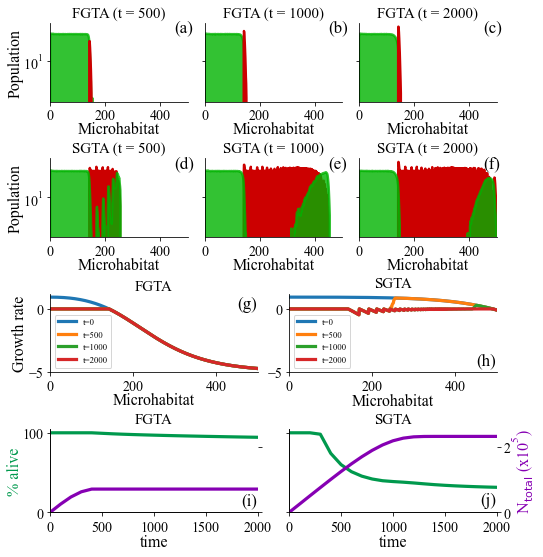

In [9]:
def plotAllDeathDistbs(FGTA_live, FGTA_dead, FGTA_gRate, SGTA_live, SGTA_dead, SGTA_gRate):
    '''this is a massive mthod to make one figure for all the with death stuff. has the alive and dead populations for 
    three time values, the growth rates, and the % alive compositions for the FGTA and SGTA systems'''
    
    max_value_pops = max(np.amax(FGTA_live[1:]), np.amax(FGTA_dead[1:]), np.amax(SGTA_live[1:]), np.amax(SGTA_dead[1:]))
    min_malue_pops = max(np.amin(FGTA_live[1:]), np.amin(FGTA_dead[1:]), np.amin(SGTA_live[1:]), np.amin(SGTA_dead[1:]))
    max_value_gRate = max(np.amax(FGTA_gRate[1:]), np.amax(SGTA_gRate[1:]))
    min_value_gRate = min(np.amin(FGTA_gRate[1:]), np.amin(SGTA_gRate[1:]))
    max_value_X = max(FGTA_live[0])
    
    
    # accent line colours for spatial and gRates
    linColour_alive = '#00b300'
    linColour_alive_accent = '#006600'
    linColour_dead = '#cc0000'
    linColour_dead_accent = '#660000'
    linColour_gRate = '#009999'
    linColour_gRate_accent = '#006666'
    
    # size and quality of the image
    #fig = plt.figure(figsize=(14, 16), dpi=400)
    fig = plt.figure()
    fig.set_size_inches(8,9)
    
    #use this to adjust the individual no. of gridspecs involved
    # this is the master gridspec which will have many nested gridspecs inside
    gs0 = gridspec.GridSpec(nrows=4, ncols=1, hspace=0.62)
    
    # here the individual subfigures are adjusted and spacing sorted out
    # this is the plots of the FGTA alive and dead over time
    #the notation is a bit shaky here, improve next time
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=6, subplot_spec=gs0[0], wspace=0.28)
    ax11 = fig.add_subplot(gs00[0:94, :2])
    ax12 = fig.add_subplot(gs00[0:94, 2:4], sharey=ax11)
    ax13 = fig.add_subplot(gs00[0:94, 4:], sharey=ax11)
    
    #this is SGTA alive and dead over time
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=6, subplot_spec=gs0[1], wspace=0.28)
    ax21 = fig.add_subplot(gs01[0:94, :2])
    ax22 = fig.add_subplot(gs01[0:94, 2:4], sharey=ax21)
    ax23 = fig.add_subplot(gs01[0:94, 4:], sharey=ax21)
    
    # this is the two gRate distributions over time
    gs02 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=6, subplot_spec=gs0[2], wspace=0.66)
    ax31 = fig.add_subplot(gs02[0:94, :3])
    ax32 = fig.add_subplot(gs02[0:94, 3:], sharey=ax31)
    
    #this is the two percent alive plots
    gs03 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[3], wspace=0.66)
    ax41 = fig.add_subplot(gs03[0, :3])
    ax42 = fig.add_subplot(gs03[0, 3:], sharey=ax41)
    
    # combine all the axes into lists
    FGTA_axArr = [ax11, ax12, ax13]
    SGTA_axArr = [ax21, ax22, ax23]
    gRateAxArr = [ax31, ax32]
    percentAxArr = [ax41, ax42]
    allAxArr = [ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax41, ax42]
    
    # here the data is added to the plots
    lineWidthThicc = 2.4
    lineWidth = 3.2
    
    time1 = 500.
    time2 = 1000.
    time3 = 2000.
    timestep = 100.
    timeLabelList = [0, int(time1), int(time2), int(time3)]
    
    # this gets us the indexes of the total data corresponding to the desired cutoff times 
    get_tIndex = lambda time, timestep : int(time/timestep)+1
    
    tIndex1 = get_tIndex(time1, timestep)
    tIndex2 = get_tIndex(time2, timestep)
    tIndex3 = get_tIndex(time3, timestep)
    tIndexes = [tIndex1, tIndex2, tIndex3]
    
    #this is the FGTA and SGTA alive and dead over three time selections, t=500, 1000, 2000
    #these are remade so that only the selected indexes are plotted
    for i in range(0, len(tIndexes)):
        t_index = tIndexes[i]
        
#         FGTA_axArr[i].plot(FGTA_dead[0], FGTA_dead[t_index], color=linColour_dead, linewidth=lineWidth)            
#         SGTA_axArr[i].plot(SGTA_dead[0], SGTA_dead[t_index], color=linColour_dead, linewidth=lineWidth)

#         FGTA_axArr[i].plot(FGTA_live[0], FGTA_live[t_index], color=linColour_alive, linewidth=lineWidth)
#         SGTA_axArr[i].plot(SGTA_live[0], SGTA_live[t_index], color=linColour_alive, linewidth=lineWidth)
                    
        SGTA_axArr[i].fill_between(SGTA_dead[0], 0, SGTA_dead[t_index], color=linColour_dead, linewidth=lineWidth-0.8)

        FGTA_axArr[i].fill_between(FGTA_live[0], 0, FGTA_live[t_index], color=linColour_alive, linewidth=lineWidth-0.8, alpha=0.8)
        SGTA_axArr[i].fill_between(SGTA_live[0], 0, SGTA_live[t_index], color=linColour_alive, linewidth=lineWidth-0.8, alpha=0.8)
        
        FGTA_axArr[i].fill_between(FGTA_dead[0], 0, FGTA_dead[t_index], color=linColour_dead, linewidth=lineWidth-0.8)

    ##############################################################################################################
    # now for the gRate ones
    #for i in range(1, len(FGTA_gRate)):
    #    if i%4==0:
    #        ax31.plot(FGTA_gRate[0], FGTA_gRate[i], color=linColour_gRate_accent, linewidth=lineWidth)
    #        ax32.plot(SGTA_gRate[0], SGTA_gRate[i], color=linColour_gRate_accent, linewidth=lineWidth)
    #        
    #    else:
    #        ax31.plot(FGTA_gRate[0], FGTA_gRate[i], color=linColour_gRate, linewidth=lineWidth)
    #        ax32.plot(SGTA_gRate[0], SGTA_gRate[i], color=linColour_gRate, linewidth=lineWidth)
    #        
    ###################################################################################################### 
    # gRate replaced so that it only plots the growth rates at the three time intervals from the 
    # above pop distbs, also includes the t=0 measurement
    tIndexes.insert(0, 1)
    for i in range(len(tIndexes)):
        t_index = tIndexes[i]
        
        ax31.plot(FGTA_gRate[0], FGTA_gRate[t_index], linewidth=lineWidth, label='t='+str(timeLabelList[i]))
        ax32.plot(SGTA_gRate[0], SGTA_gRate[t_index], linewidth=lineWidth, label='t='+str(timeLabelList[i]))
        
    # now the percentage alive ones
    FGTA_percentAlive, FGTA_popSize = getPercentAliveAndPopSizeOverTime(FGTA_live, FGTA_dead)
    SGTA_percentAlive, SGTA_popSize = getPercentAliveAndPopSizeOverTime(liveData=SGTA_live, deadData=SGTA_dead)
    t = [i for i in np.linspace(0., 2000., 21)]
    
    maxOverallPopSize = max(max(FGTA_popSize), max(SGTA_popSize))
    maxPercentAlive = max(max(FGTA_percentAlive), max(SGTA_percentAlive))
    percentColor = '#00994d'
    popColor = '#8600b3'
    
    
    # This plots the two scales of % alive and size on the same graph. also sets colours and limits
    def two_scales(ax1, time, data1, data2, c1, c2):
        ax2 = ax1.twinx()
        ax1.plot(time, data1, color=c1, linewidth=lineWidth)
        ax1.set_xlabel('time', fontsize=12)
        ax1.set_ylim(0., 105.)
        
        ax2.plot(time, data2, color=c2, linewidth=lineWidth)
        ax2.set_ylim(0., 1.1*maxOverallPopSize)
        return ax1, ax2
    
    
    ax41, ax41a = two_scales(ax41, t, FGTA_percentAlive, FGTA_popSize, percentColor, popColor)
    ax42, ax42a = two_scales(ax42, t, SGTA_percentAlive, SGTA_popSize, percentColor, popColor)
    
    allAxArr.extend([ax41a, ax42a])

    # Change color of each axis
#     def color_y_axis(ax, color):
#         """Color your axes."""
#         for yt in ax.get_yticklabels():
#             yt.set_color(color)

#     color_y_axis(ax41, percentColor)
#     color_y_axis(ax41a, popColor)
#     color_y_axis(ax42, percentColor)
#     color_y_axis(ax42a, popColor)
   
    ###########################################################################################
    # add labels, titles etc here 
    # these set the inner y labels invisible for neatness 
    plt.setp(ax12.get_yticklabels(), visible=False)
    plt.setp(ax13.get_yticklabels(), visible=False)
    plt.setp(ax22.get_yticklabels(), visible=False)
    plt.setp(ax23.get_yticklabels(), visible=False)
    plt.setp(ax41a.get_yticklabels(), visible=False)
    plt.setp(ax42.get_yticklabels(), visible=False)
    
    # add labels, titles etc here 
    titleSize = 15
    labelSize = 16
    numbersize = 14
    legendsize = 8.8
    IDsize=17
    
    
    # pop size distributions 
    for FGTA_ax, SGTA_ax, tLabel in zip(FGTA_axArr, SGTA_axArr, timeLabelList[1:]):
        #tLabel = (tIndex-1)*100
        FGTA_ax.set_title('FGTA (t = '+str(tLabel)+')', fontsize=titleSize)
        FGTA_ax.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=-1)
        FGTA_ax.set_xlim(0, 500)
        #FGTA_ax.set_ylim(0, 0.8*max_value_pops)
        FGTA_ax.semilogy()
        
        SGTA_ax.set_title('SGTA (t = '+str(tLabel)+')', fontsize=titleSize)
        SGTA_ax.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=-1)
        SGTA_ax.set_xlim(0, 500)
        #SGTA_ax.set_ylim(0, 0.8*max_value_pops)
        SGTA_ax.semilogy()
        
        
    FGTA_axArr[0].set_ylabel('Population', fontsize=labelSize, labelpad=0)
    SGTA_axArr[0].set_ylabel('Population', fontsize=labelSize, labelpad=0)
    
    
    ####################################################################################
    # gRate distributons
    ax31.set_title('FGTA', fontsize=titleSize, pad=-1)
    ax31.set_ylabel('Growth rate', fontsize=labelSize, labelpad=0)
    ax31.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=-1)
    ax31.set_xlim(0, 500)
    ax31.legend(loc='lower left', fontsize=legendsize)
    
    ax32.set_title('SGTA', fontsize=titleSize)
    ax32.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax32.set_xlim(0, 500)
    ax32.legend(loc='lower left', fontsize=legendsize)
    
    #########################################################################################
    # percent alive and size
    ax41.set_title('FGTA', fontsize=titleSize)
    ax41.set_xlabel('time', fontsize=labelSize, labelpad=0)
    ax41.set_xlim(0, max(t))
    ax41.set_ylabel('% alive', fontsize=labelSize, labelpad=-1, color=percentColor)
    ax41a.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax41a.yaxis.offsetText.set_fontsize(labelSize)
    ax41a.yaxis.get_offset_text().set_visible(False) # removes the 1e5 from the top corner of the plot
    ax41.tick_params(axis='x', pad=4)
    
    ax42.set_title('SGTA', fontsize=titleSize)
    ax42.set_xlabel('time', fontsize=labelSize, labelpad=0)
    ax42a.set_ylabel('$N_{\\rm total}$ (x10$^5$)', fontsize=labelSize, color=popColor, labelpad=0)
    ax42.set_xlim(0, max(t))
    # this makes the axis in scientific notation. the next line makes the 1e5 bigger
    ax42a.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax42a.yaxis.offsetText.set_fontsize(labelSize)
    ax42a.yaxis.get_offset_text().set_visible(False)
    ax42.tick_params(axis='x', pad=4)
    
    for ax in allAxArr:
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
        #ax.tick_params(direction='in')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
    
    letter_x = 0.9
    letter_y = 0.89
    ax11.text(letter_x, letter_y, '(a)', fontsize=IDsize, transform=ax11.transAxes)
    ax12.text(letter_x, letter_y, '(b)', fontsize=IDsize, transform=ax12.transAxes)
    ax13.text(letter_x, letter_y, '(c)', fontsize=IDsize, transform=ax13.transAxes)
    
    ax21.text(letter_x, letter_y, '(d)', fontsize=IDsize, transform=ax21.transAxes)
    ax22.text(letter_x, letter_y, '(e)', fontsize=IDsize, transform=ax22.transAxes)
    ax23.text(letter_x, letter_y, '(f)', fontsize=IDsize, transform=ax23.transAxes)
    
    ax31.text(0.9, 0.82, '(g)', fontsize=IDsize, transform=ax31.transAxes) 
    ax32.text(0.9, 0.1, '(h)', fontsize=IDsize, transform=ax32.transAxes)
    
    ax41.text(0.92, 0.1, '(i)', fontsize=IDsize, transform=ax41.transAxes)
    ax42.text(0.92, 0.1, '(j)', fontsize=IDsize, transform=ax42.transAxes)
    
    
    plt.savefig('Paper_figures/all_wDeath_distributions-FINAL.pdf', bbox_inches='tight', dpi=330)
    plt.show()
    
plotAllDeathDistbs(FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_wDeath_alpha_specificAlpha_deadSpatial, FGTA_wDeath_alpha_specificAlpha_gRate, SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_wDeath_alpha_specificAlpha_deadSpatial, SGTA_wDeath_alpha_specificAlpha_gRate)
    
    

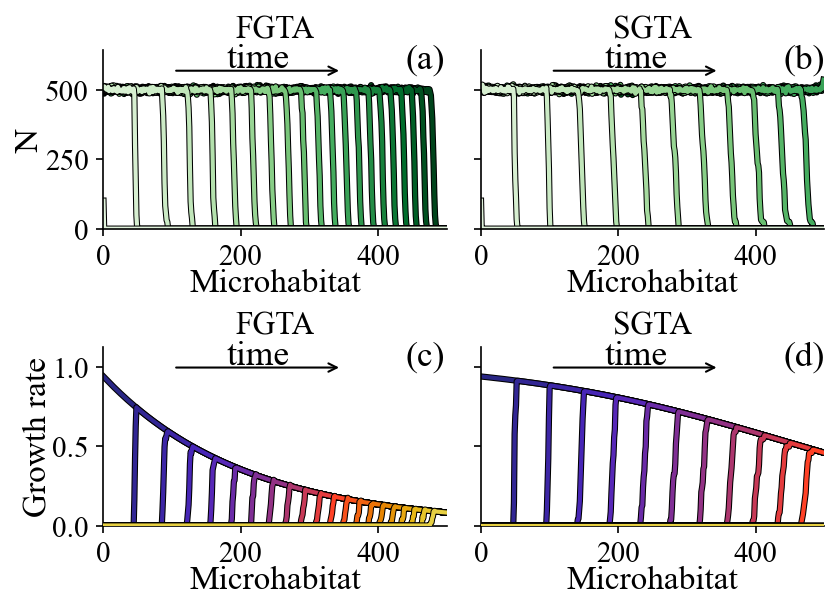

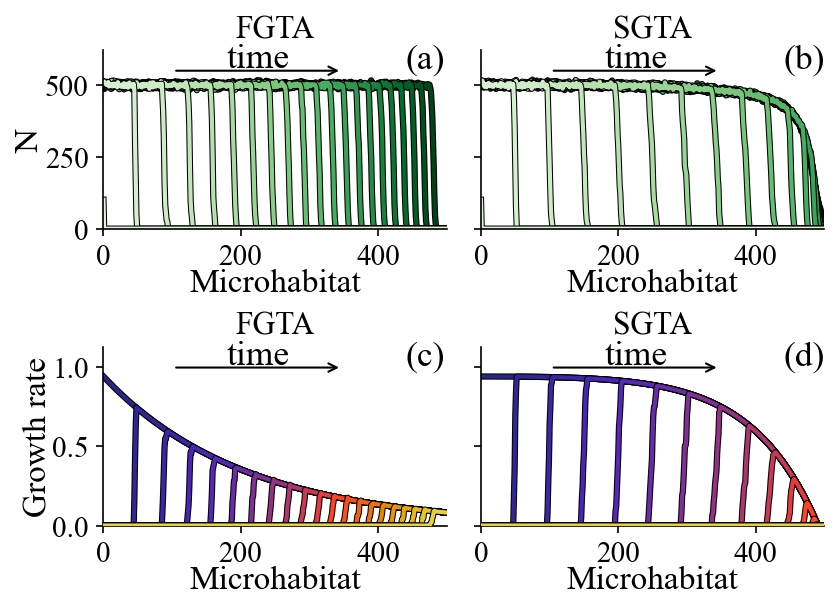

In [23]:
def plotRealisticAndBetaSwapped(realSpatialData, realBSSpatialData, realGRateData, realBSGrateData, filename):
    max_value_pops = max(np.amax(realSpatialData[1:]), np.amax(realBSSpatialData[1:]))
    min_malue_pops = max(np.amin(realSpatialData[1:]), np.amin(realBSSpatialData[1:]))
    max_value_gRate = max(np.amax(realGRateData[1:]), np.amax(realBSGrateData[1:]))
    min_value_gRate = min(np.amin(realGRateData[1:]), np.amin(realBSGrateData[1:]))
    max_value_X = max(realSpatialData[0])
    
    
    # accent line colours for spatial and gRates
    linColour_alive = '#00b300'
    linColour_alive_accent = '#006600'
    linColour_dead = '#cc0000'
    linColour_dead_accent = '#660000'
    linColour_gRate = '#009999'
    linColour_gRate_accent = '#006666'
    
    # linewidths
    lineWidthThicc = 4.2
    lineWidth = 2.
    # fontsizes
    titleSize = 15
    labelSize = 16
    numbersize = 14
    legendsize = 8.8
    IDsize=17
    
    # size and quality of the image
    #fig = plt.figure(figsize=(14, 10), dpi=400)
    fig = plt.figure(dpi=150)
    fig.set_size_inches(6.2, 4.2)
    
    #use this to adjust the individual no. of gridspecs involved
    # this is the master gridspec which will have many nested gridspecs inside
    gs0 = gridspec.GridSpec(nrows=2, ncols=1, hspace=0.66)
    
    #this is the spatial dstbs for the realistic and its beta swapped counterpart
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs0[0], wspace=0.1)
    ax11 = fig.add_subplot(gs00[0, :1])
    ax12 = fig.add_subplot(gs00[0, 1:], sharey=ax11)
    
    # gRate distbs
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs0[1], wspace=0.1)
    ax21 = fig.add_subplot(gs01[0, :1])
    ax22 = fig.add_subplot(gs01[0, 1:], sharey=ax21)
    
    allAxes = [ax11, ax12, ax21, ax22]
    
    counter = 0
    alive_colors = pl.cm.Greens(np.linspace(0.1, 1., len(realSpatialData)))
    g_rate_colours = pl.cm.CMRmap(np.linspace(0.1, 0.8, len(realSpatialData)))
    for i in range(1, len(realSpatialData)):
        
        ax11.plot(realSpatialData[0], realSpatialData[i], linewidth=lineWidth, color=alive_colors[i], zorder=-i, path_effects=[pe.Stroke(linewidth=lineWidth+1, foreground='k'), pe.Normal()])
        ax12.plot(realBSSpatialData[0], realBSSpatialData[i], linewidth=lineWidth, color=alive_colors[i], zorder=-i, path_effects=[pe.Stroke(linewidth=lineWidth+1, foreground='k'), pe.Normal()])  
        
        ax21.plot(realGRateData[0], realGRateData[i], linewidth=lineWidth, color=g_rate_colours[i], zorder=i, path_effects=[pe.Stroke(linewidth=lineWidth+1, foreground='k'), pe.Normal()])
        ax22.plot(realBSGrateData[0], realBSGrateData[i], linewidth=lineWidth, color=g_rate_colours[i], zorder=i, path_effects=[pe.Stroke(linewidth=lineWidth+1, foreground='k'), pe.Normal()])
        
        
    # add labels, titles etc here 
    # these set the inner y labels invisible for neatness 
    plt.setp(ax12.get_yticklabels(), visible=False)
    plt.setp(ax22.get_yticklabels(), visible=False)
    
    for ax in allAxes:
        ax.set_xlim(0, 500)
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
        ax.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=-1)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
    
    ax11.set_ylim(0, 1.2*max_value_pops)
    ax11.set_title('FGTA', fontsize=titleSize)
    ax11.set_ylabel('$N$', fontsize=labelSize, labelpad=0)
    
    ax12.set_ylim(0, 1.2*max_value_pops)
    ax12.set_title('SGTA', fontsize=titleSize)
    
    ax21.set_ylim(0, 1.2*max_value_gRate)
    ax21.set_title('FGTA', fontsize=titleSize)
    ax21.set_ylabel('Growth rate', fontsize=labelSize, labelpad=0)
    
    ax22.set_ylim(0, 1.2*max_value_gRate)
    ax22.set_title('SGTA', fontsize=titleSize)
    
    ax11.annotate('', xy=(0.7*max_value_X, 1.06*max_value_pops), xytext=(0.2*max_value_X, 1.06*max_value_pops), arrowprops=dict(arrowstyle="->"))
    ax11.text(0.36*max_value_X, 1.08*max_value_pops, 'time', fontsize=IDsize)
    
    ax12.annotate('', xy=(0.7*max_value_X, 1.06*max_value_pops), xytext=(0.2*max_value_X, 1.06*max_value_pops), arrowprops=dict(arrowstyle="->"))
    ax12.text(0.36*max_value_X, 1.08*max_value_pops, 'time', fontsize=IDsize)
    
    ax21.annotate('', xy=(0.7*max_value_X, 1.06*max_value_gRate), xytext=(0.2*max_value_X, 1.06*max_value_gRate), arrowprops=dict(arrowstyle="->"))
    ax21.text(0.36*max_value_X, 1.08*max_value_gRate, 'time', fontsize=IDsize)
    
    ax22.annotate('', xy=(0.7*max_value_X, 1.06*max_value_gRate), xytext=(0.2*max_value_X, 1.06*max_value_gRate), arrowprops=dict(arrowstyle="->"))
    ax22.text(0.36*max_value_X, 1.08*max_value_gRate, 'time', fontsize=IDsize)
    
    ax11.text(0.88, 0.9, '(a)', fontsize=IDsize, transform=ax11.transAxes)
    ax12.text(0.88, 0.9, '(b)', fontsize=IDsize, transform=ax12.transAxes)
    ax21.text(0.88, 0.9, '(c)', fontsize=IDsize, transform=ax21.transAxes) 
    ax22.text(0.88, 0.9, '(d)', fontsize=IDsize, transform=ax22.transAxes)
    
    plt.savefig('Paper_figures/'+filename+'.pdf', bbox_inches='tight', dpi=330)
    

plotRealisticAndBetaSwapped(FGTA_realistic_alpha_specificAlpha_spatial, FGTA_realistic_BS_alpha_specificAlpha_spatial, FGTA_realistic_alpha_specificAlpha_gRate, FGTA_realistic_BS_alpha_specificAlpha_gRate, 'realistic_phi_and_BS-FINAL')

plotRealisticAndBetaSwapped(FGTA_realistic_alpha_specificAlpha_spatial, SGTA_simple_alpha_specificAlpha_spatial, FGTA_realistic_alpha_specificAlpha_gRate, SGTA_simple_alpha_specificAlpha_gRate, 'supplementary_realistic_simple_comparison-FINAL')
    

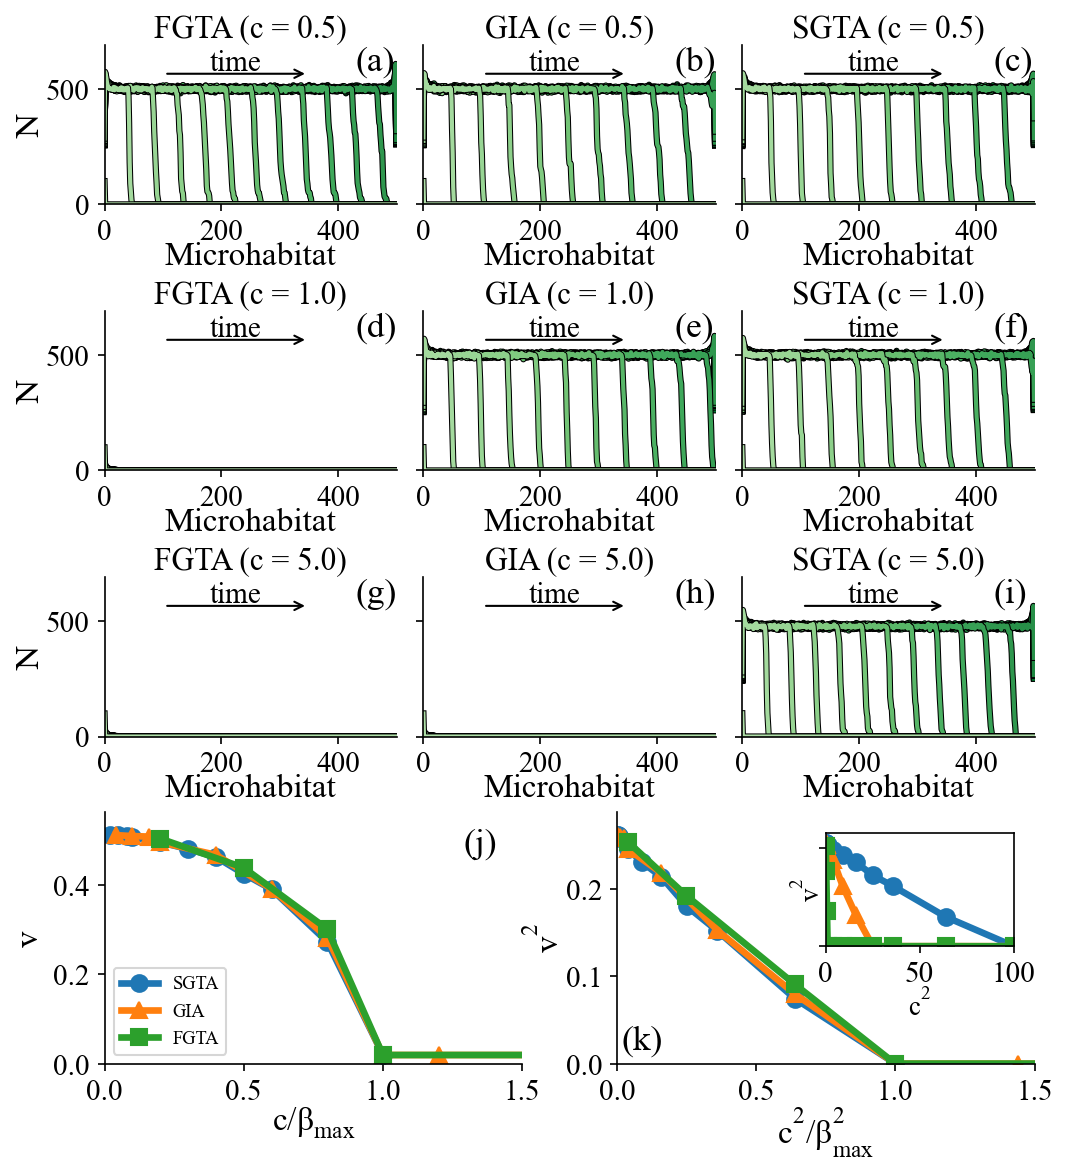

In [17]:
def plotUniformCDistributions_NoGRate(FGTA_c_spatial_list, FGTA_c_gRate_list, GITA_c_spatial_list, GITA_c_gRate_list, SGTA_c_spatial_list, SGTA_c_gRate_list):
    
    # unpack the lists here
    FGTA_02_spat, FGTA_05_spat, FGTA_08_spat, FGTA_1_spat, FGTA_2_spat, FGTA_3_spat, FGTA_4_spat, FGTA_5_spat, FGTA_6_spat, FGTA_8_spat, FGTA_10_spat = FGTA_c_spatial_list    
    GITA_02_spat, GITA_05_spat, GITA_08_spat, GITA_1_spat, GITA_2_spat, GITA_3_spat, GITA_4_spat, GITA_5_spat, GITA_6_spat, GITA_8_spat, GITA_10_spat = GITA_c_spatial_list
    SGTA_02_spat, SGTA_05_spat, SGTA_08_spat, SGTA_1_spat, SGTA_2_spat, SGTA_3_spat, SGTA_4_spat, SGTA_5_spat, SGTA_6_spat, SGTA_8_spat, SGTA_10_spat = SGTA_c_spatial_list
    
    def getMaxValInArray(list_of_arrays):
        
        max_list = []
        for listo in list_of_arrays:
            max_val = np.amax(listo[1:])
            max_list.append(max_val)
            
        return max(max_list)
        
    max_value_pops = max(getMaxValInArray(FGTA_c_spatial_list), getMaxValInArray(SGTA_c_spatial_list))
    min_value_pops = min(min(map(np.amin, FGTA_c_spatial_list)), min(map(np.amin, SGTA_c_spatial_list)))
    min_value_gRate = min(min(map(np.amin, FGTA_c_spatial_list)), min(map(np.amin, SGTA_c_spatial_list)))
    max_value_X = 500
    
    # accent line colours for spatial and gRates
    linColour_alive = '#00b300'
    linColour_alive_accent = '#006600'
    linColour_dead = '#cc0000'
    linColour_dead_accent = '#660000'
    linColour_gRate = '#009999'
    linColour_gRate_accent = '#006666'
    # linewidths
    lineWidthThicc = 4.2
    lineWidth = 2
    # fontsizes
    titleSize = 15
    labelSize = 16
    numbersize = 14
    legendsize = 8.8
    IDsize=17
    
    # size and quality of the image
    #fig = plt.figure(figsize=(15, 18), dpi=400)
    fig = plt.figure(dpi=150)
    fig.set_size_inches(8,9)
    
    #use this to adjust the individual no. of gridspecs involved
    # this is the master gridspec which will have many nested gridspecs inside
    gs0 = gridspec.GridSpec(nrows=100, ncols=1, hspace=0.66)
    
    #this is the spatial dstbs for c = 0.5
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=6, subplot_spec=gs0[0:17], wspace=0.2)
    ax11 = fig.add_subplot(gs00[0:94, :2])
    ax12 = fig.add_subplot(gs00[0:94, 2:4], sharey=ax11)
    ax13 = fig.add_subplot(gs00[0:94, 4:], sharey=ax11)
    
    # spatial distbs for c = 1.0
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=6, subplot_spec=gs0[26:43], wspace=0.2)
    ax21 = fig.add_subplot(gs01[0:94, :2])
    ax22 = fig.add_subplot(gs01[0:94, 2:4], sharey=ax21)
    ax23 = fig.add_subplot(gs01[0:94, 4:], sharey=ax21)
    
    # spatial distbs for c = 5.0
    gs02 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=6, subplot_spec=gs0[52:69], wspace=0.2)
    ax31 = fig.add_subplot(gs02[0:94, :2])
    ax32 = fig.add_subplot(gs02[0:94, 2:4], sharey=ax31)
    ax33 = fig.add_subplot(gs02[0:94, 4:], sharey=ax31)
    
    # wavespeeds and wavespeeds sq
    gs03 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=100, subplot_spec=gs0[75:], wspace=0.2)
    ax41 = fig.add_subplot(gs03[0:, :45]) # v vs c/b
    ax43 = fig.add_subplot(gs03[0:, 55:]) # v^2 vs (c/b)^2
    ax42 = axins2 = inset_axes(ax43, width="45%", height="45%", loc=1, borderpad=1.) # v^2 vs c^2 (inset)
    
    FGTA_beta_max = 10. - 9.*(1e6/(33+1e6))
    GITA_beta_max = 5.
    SGTA_beta_max = 1. + 9.*(1e6/(33+1e6))
    
    
    allDistbAxArr = [ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33]
    allPopAxArr = [ax11, ax12, ax13, ax21, ax22, ax23, ax31, ax32, ax33]
    #allGRateAxArr = [ax41, ax42, ax43]
    #allWavespeedAxArr = [ax51, ax52, ax53]
    concentrations_list = [0.2, 0.5, 0.8, 1., 2., 3., 4., 5., 6., 8., 10.]
    # the scaled lists here are for plotting v vs c/beta_max
    FGTA_beta_scaled_c = [c/FGTA_beta_max for c in concentrations_list]
    GITA_beta_scaled_c = [c/GITA_beta_max for c in concentrations_list]
    SGTA_beta_scaled_c = [c/SGTA_beta_max for c in concentrations_list]
    concentrations_list_sq = [c**2 for c in concentrations_list]
    FGTA_beta_scaled_c_sq = [(c/FGTA_beta_max)**2 for c in concentrations_list]
    GITA_beta_scaled_c_sq = [(c/GITA_beta_max)**2 for c in concentrations_list]
    SGTA_beta_scaled_c_sq = [(c/SGTA_beta_max)**2 for c in concentrations_list]
    
    
    def plotDistributions(axis, data, lineColour, lineThickness, title='bla'):
        
        alive_colors = pl.cm.Greens(np.linspace(0.3, 1., len(data)))
        
        counter = 0
        for i in range(1, len(data)):
            
            axis.plot(data[0], data[i], linewidth=lineWidth, color=alive_colors[i], zorder=-i, path_effects=[pe.Stroke(linewidth=lineWidth+1, foreground='k'), pe.Normal()])
            
        axis.set_title(title, fontsize=titleSize, pad=-3)
          
            
    def getWaveSpeeds(spatData):
        popThreshold = 20
        spatData_wavefronts = []
        spatData_wavespeeds = []
        timestep = 100.
        #here we iterate over the input data and get the max indices of the data where the population
        #is above a certain threshold. this gives us the wavefron position over time
        for i in range(1, len(spatData)):
            if any(pop > popThreshold for pop in spatData[i]):
                spatData_wavefronts.append(max((x, y) for x, y in enumerate(spatData[i]) if y > popThreshold)[0])
            else:
                spatData_wavefronts.append(0)
                
        #print(spatData_wavefronts)
        spatData_wavefronts = [x for x in spatData_wavefronts if x < 499]
        for i in range(1, len(spatData_wavefronts)):
            speed = (spatData_wavefronts[i]-spatData_wavefronts[i-1])/timestep
            spatData_wavespeeds.append(speed)
            
        return spatData_wavespeeds
    
    
    def getAvgSpeed(waveSpeedList):
        
        filtered_list = [s for s in waveSpeedList if s>0.]
        return np.mean(filtered_list)
    
    t_speeds = np.linspace(0, 2000., 20)
    
    all_FGTA_speeds = [getWaveSpeeds(spat) for spat in FGTA_c_spatial_list]
    #print(all_FGTA_speeds)
    FGTA_v_vs_c = [getAvgSpeed(v) for v in all_FGTA_speeds]
    FGTA_vSq_vs_cSq = [v**2 for v in FGTA_v_vs_c]
    
    all_GITA_speeds = [getWaveSpeeds(spat) for spat in GITA_c_spatial_list]
    GITA_v_vs_c = [getAvgSpeed(v) for v in all_GITA_speeds]
    GITA_vSq_vs_cSq = [v**2 for v in GITA_v_vs_c]
    
    all_SGTA_speeds = [getWaveSpeeds(spat) for spat in SGTA_c_spatial_list]
    SGTA_v_vs_c = [getAvgSpeed(v) for v in all_SGTA_speeds]
    SGTA_vSq_vs_cSq = [v**2 for v in SGTA_v_vs_c]
    
    max_wavespeed_val = max(max(FGTA_v_vs_c), max(GITA_v_vs_c), max(SGTA_v_vs_c))
    max_wavespeedSq_val = max(max(FGTA_vSq_vs_cSq), max(GITA_vSq_vs_cSq), max(SGTA_vSq_vs_cSq))
    max_concn_val = max(concentrations_list)
    max_conc_beta_val = max(max(FGTA_beta_scaled_c), max(GITA_beta_scaled_c), max(SGTA_beta_scaled_c))
    max_concSq_val = max(concentrations_list_sq)
    max_concSq_bSq_val =  max(max(FGTA_beta_scaled_c_sq), max(GITA_beta_scaled_c_sq), max(SGTA_beta_scaled_c_sq))
    

            
    # data plotted here 
    plotDistributions(ax11, FGTA_05_spat, linColour_alive, lineWidth, 'FGTA (c = 0.5)')
    plotDistributions(ax12, GITA_05_spat, linColour_alive, lineWidth, 'GIA (c = 0.5)')
    plotDistributions(ax13, SGTA_05_spat, linColour_alive, lineWidth, 'SGTA (c = 0.5)')
    
    plotDistributions(ax21, FGTA_1_spat, linColour_alive, lineWidth, 'FGTA (c = 1.0)')
    plotDistributions(ax22, GITA_1_spat, linColour_alive, lineWidth, 'GIA (c = 1.0)')
    plotDistributions(ax23, SGTA_1_spat, linColour_alive, lineWidth, 'SGTA (c = 1.0)')
    
    plotDistributions(ax31, FGTA_5_spat, linColour_alive, lineWidth, 'FGTA (c = 5.0)')
    plotDistributions(ax32, GITA_5_spat, linColour_alive, lineWidth, 'GIA (c = 5.0)')
    plotDistributions(ax33, SGTA_5_spat, linColour_alive, lineWidth, 'SGTA (c = 5.0)')
          
    marker_size = 8
    line_extra = 1.2
    ax41.plot(SGTA_beta_scaled_c, SGTA_v_vs_c, linewidth=lineWidth+line_extra, label='SGTA', marker='o', markersize=marker_size)
    ax41.plot(GITA_beta_scaled_c, GITA_v_vs_c, linewidth=lineWidth+line_extra, label='GIA', marker='^', markersize=marker_size)
    ax41.plot(FGTA_beta_scaled_c, FGTA_v_vs_c, linewidth=lineWidth+line_extra, label='FGTA', marker='s', markersize=marker_size)
    
    ax42.plot(concentrations_list_sq, SGTA_vSq_vs_cSq, linewidth=lineWidth+line_extra, label='SGTA', marker='o', markersize=marker_size)
    ax42.plot(concentrations_list_sq, GITA_vSq_vs_cSq, linewidth=lineWidth+line_extra, label='GIA', marker='^', markersize=marker_size)
    ax42.plot(concentrations_list_sq, FGTA_vSq_vs_cSq, linewidth=lineWidth+line_extra, label='FGTA', marker='s', markersize=marker_size)
    
    ax43.plot(SGTA_beta_scaled_c_sq, SGTA_vSq_vs_cSq, linewidth=lineWidth+line_extra, label='SGTA', marker='o', markersize=marker_size)
    ax43.plot(GITA_beta_scaled_c_sq, GITA_vSq_vs_cSq, linewidth=lineWidth+line_extra, label='GIA', marker='^', markersize=marker_size)
    ax43.plot(FGTA_beta_scaled_c_sq, FGTA_vSq_vs_cSq, linewidth=lineWidth+line_extra, label='FGTA', marker='s', markersize=marker_size)
    
    
    # graph formatting etc here
    plt.setp(ax12.get_yticklabels(), visible=False)
    plt.setp(ax13.get_yticklabels(), visible=False)
    plt.setp(ax22.get_yticklabels(), visible=False)
    plt.setp(ax23.get_yticklabels(), visible=False)
    plt.setp(ax32.get_yticklabels(), visible=False)
    plt.setp(ax33.get_yticklabels(), visible=False)
    plt.setp(ax42.get_yticklabels(), visible=False)
    #plt.setp(ax42.get_xticklabels(), visible=False)
  

    #ax41.set_title('v vs c/β$_{\max}$', fontsize=titleSize)
    #ax42.set_title('v$^2$ vs c$^2$', fontsize=titleSize-3)
    #ax43.set_title('v$^2$ vs c$^2$/β$_{\max}^2$', fontsize=titleSize)
    
    for ax in allDistbAxArr:
        ax.set_xlim(0, 500)
        ax.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=-2)
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
        # below code adds an arrow above the graphs indicating the direction of time
        ax.annotate('', xy=(0.7*max_value_X, 0.9*max_value_pops), xytext=(0.2*max_value_X, 0.9*max_value_pops), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 0.92*max_value_pops, 'time', fontsize=14)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
    
    for ax in allPopAxArr:
        ax.set_ylim(0, 1.1*max_value_pops)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        
        
    ax11.set_ylabel('$N$', fontsize=labelSize, labelpad=0)
    ax21.set_ylabel('$N$', fontsize=labelSize, labelpad=0)
    ax31.set_ylabel('$N$', fontsize=labelSize, labelpad=0)
    
    ax41.set_ylabel('v', fontsize=labelSize)
    ax41.set_xlabel('c/β$_{max}$', fontsize=labelSize, labelpad=0)
    ax41.xaxis.set_tick_params(labelsize=numbersize)
    ax41.yaxis.set_tick_params(labelsize=numbersize)
    ax41.set_xlim(0, 1.5)
    ax41.set_ylim(0, 1.1*max_wavespeed_val)
    ax41.legend(loc='lower left', fontsize=legendsize)
    
    ax42.set_ylabel('v$^2$', fontsize=labelSize-3, labelpad=0)
    ax42.set_xlabel('c$^2$', fontsize=labelSize-3, labelpad=0)
    ax42.xaxis.set_tick_params(labelsize=numbersize)
    ax42.yaxis.set_tick_params(labelsize=numbersize)
    ax42.set_xlim(0, max_concSq_val)
    ax42.set_ylim(0, 1.1*max_wavespeedSq_val)
    #ax42.legend(loc='upper right', fontsize=legendsize)
    
    #ax43.yaxis.set_label_position("right")
    #ax43.yaxis.tick_right()
    ax43.set_ylabel('v$^2$', fontsize=labelSize, labelpad=0)
    ax43.set_xlabel('c$^2$/β$_{max}^2$', fontsize=labelSize, labelpad=0)
    ax43.xaxis.set_tick_params(labelsize=numbersize)
    ax43.yaxis.set_tick_params(labelsize=numbersize)
    ax43.set_xlim(0, 1.5)
    ax43.set_ylim(0, 1.1*max_wavespeedSq_val)
    #ax43.legend(loc='upper right', fontsize=legendsize)
    
    ax41.spines['right'].set_visible(False)
    ax41.spines['top'].set_visible(False)
    ax43.spines['right'].set_visible(False)
    ax43.spines['top'].set_visible(False)
    
    pops_h = 0.92
    gRate_h = 1.06
    wave_h = 0.98
    v_h = 0.98
    
    letter_y = 0.84
    letter_x = 0.86
    
    ax11.text(letter_x, letter_y, '(a)', fontsize=IDsize, transform=ax11.transAxes)
    ax12.text(letter_x, letter_y, '(b)', fontsize=IDsize, transform=ax12.transAxes)
    ax13.text(letter_x, letter_y, '(c)', fontsize=IDsize, transform=ax13.transAxes)
    
    ax21.text(letter_x, letter_y, '(d)', fontsize=IDsize, transform=ax21.transAxes)
    ax22.text(letter_x, letter_y, '(e)', fontsize=IDsize, transform=ax22.transAxes)
    ax23.text(letter_x, letter_y, '(f)', fontsize=IDsize, transform=ax23.transAxes)
    
    ax31.text(letter_x, letter_y, '(g)', fontsize=IDsize, transform=ax31.transAxes) 
    ax32.text(letter_x, letter_y, '(h)', fontsize=IDsize, transform=ax32.transAxes)
    ax33.text(letter_x, letter_y, '(i)', fontsize=IDsize, transform=ax33.transAxes)
    
    ax41.text(letter_x, letter_y, '(j)', fontsize=IDsize, transform=ax41.transAxes) 
    ax43.text(0.01, 0.06, '(k)', fontsize=IDsize, transform=ax43.transAxes)
    
    #ax41.text(0.94*max_concn_val, wave_h*max_wavespeed_val, '(j)', fontsize=IDsize) 
    
    plt.savefig('Paper_figures/uniform_c_distbs_no_gRate_and_wavespeeds-FINAL.pdf', bbox_inches='tight', dpi=330)
    #plt.show()
    
   
    
plotUniformCDistributions_NoGRate(uniform_FGTA_spatial_list, uniform_FGTA_gRate_list, uniform_GITA_spatial_list, uniform_GITA_gRate_list, uniform_SGTA_spatial_list, uniform_SGTA_gRate_list)
   

In [222]:
def supplementary_steep_alpha(FGTA_spat, GITA_spat, SGTA_spat, FGTA_gRate, GITA_gRate, SGTA_gRate):
    '''this is the big method to make figure 3? which has the pop and gRate distbs for the simple 
    growth curves, specific alpha, no death. also has '''
    
    # max and min values of population and gRate distributions, used for fine tuning graphs
    max_value_Pops = max(np.amax(FGTA_spat[1:]), np.amax(GITA_spat[1:]), np.amax(SGTA_spat[1:]))
    min_value_Pops = min(np.amin(FGTA_spat[1:]), np.amin(GITA_spat[1:]), np.amin(SGTA_spat[1:]))
    max_value_gRate = max(np.amax(FGTA_gRate[1:]), np.amax(GITA_gRate[1:]), np.amax(SGTA_gRate[1:]))
    min_value_gRate = min(np.amin(FGTA_gRate[1:]), np.amin(GITA_gRate[1:]), np.amin(SGTA_gRate[1:]))
    max_value_X = max(np.amax(FGTA_spat[0]), np.amax(GITA_spat[0]), np.amax(SGTA_spat[0]))
    
    # accent line colours for spatial and gRates
    linColour_spat = '#00b300'
    linColour_gRate = '#009999'
    
    # size and quality of the image
    #fig = plt.figure(figsize=(14, 12), dpi=400)
    fig = plt.figure()
    fig.set_size_inches(8,9)
    
    
    #use this to adjust the individual no. of gridspecs involved
    gs0 = gridspec.GridSpec(nrows=3, ncols=1, hspace=0.4)
    
    # here the individual subfigures are adjusted and spacing sorted out
    # this is the plots of wavefront position and antibiotic gradient
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=100, subplot_spec=gs0[0], wspace=1.)
    ax11 = fig.add_subplot(gs00[0, :44])
    ax12 = fig.add_subplot(gs00[0, 56:])
    
    #this is the population distributions over time
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[1], wspace=0.33)
    ax21 = fig.add_subplot(gs01[0, :2])
    ax22 = fig.add_subplot(gs01[0, 2:4], sharey=ax21)
    ax23 = fig.add_subplot(gs01[0, 4:], sharey=ax21)
    
    # this is the gRate distributions over time
    gs02 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[2], wspace=0.33)
    ax31 = fig.add_subplot(gs02[0, :2])
    ax32 = fig.add_subplot(gs02[0, 2:4], sharey=ax31)
    ax33 = fig.add_subplot(gs02[0, 4:], sharey=ax31)
    
    # combine all the axes into lists
    spatAxArr = [ax21, ax22, ax23]
    gRateAxArr = [ax31, ax32, ax33]
    allAxArr = [ax11, ax12, ax21, ax22, ax23, ax31, ax32, ax33]
    
    # here the data is added to the plots
    lineWidthThicc = 4.2
    lineWidth = 2.1
    #this is the exponential gradient comparisons
    cExp_specAlpha = getExponentialAntibioticConcentrations(alpha=0.004884694070738408, xData=FGTA_spat[0])
    cExp_002 = getExponentialAntibioticConcentrations(alpha=0.02, xData=FGTA_spat[0])
    
    ax11.plot(FGTA_spat[0], cExp_002, linewidth=lineWidthThicc, color='#DB7093', label='α = 0.02')
    ax11.plot(FGTA_spat[0], cExp_specAlpha, linewidth=lineWidthThicc, color='#68228B', label='α = 0.0049')
    
    
    # this is the wavefront vs time section. firstly the wavefronts are extracted from the data
    FGTA_waves, GITA_waves, SGTA_waves, t = getWavefrontPositionsVsT(FGTA_spat, GITA_spat, SGTA_spat)
    maxWaveVal = max(max(FGTA_waves), max(GITA_waves), max(SGTA_waves))
    
    ax12.plot(t, SGTA_waves, linewidth=lineWidthThicc, label='SGTA')
    ax12.plot(t, GITA_waves, linewidth=lineWidthThicc, label='GIA')
    ax12.plot(t, FGTA_waves, linewidth=lineWidthThicc, label='FGTA')
    
    # these are the population and growth rate distributions
    for i in range(1, len(FGTA_spat)):
        if i%4 == 0:
            ax21.plot(FGTA_spat[0], FGTA_spat[i], linewidth=lineWidth, color='black')
            ax22.plot(GITA_spat[0], GITA_spat[i], linewidth=lineWidth, color='black')
            ax23.plot(SGTA_spat[0], SGTA_spat[i], linewidth=lineWidth, color='black')
            
            ax31.plot(FGTA_gRate[0], FGTA_gRate[i], linewidth=lineWidth, color='black')
            ax32.plot(GITA_gRate[0], GITA_gRate[i], linewidth=lineWidth, color='black')
            ax33.plot(SGTA_gRate[0], SGTA_gRate[i], linewidth=lineWidth, color='black')
        else:
            ax21.plot(FGTA_spat[0], FGTA_spat[i], linewidth=lineWidth, color=linColour_spat)
            ax22.plot(GITA_spat[0], GITA_spat[i], linewidth=lineWidth, color=linColour_spat)
            ax23.plot(SGTA_spat[0], SGTA_spat[i], linewidth=lineWidth, color=linColour_spat)
            
            ax31.plot(FGTA_gRate[0], FGTA_gRate[i], linewidth=lineWidth, color=linColour_gRate)
            ax32.plot(GITA_gRate[0], GITA_gRate[i], linewidth=lineWidth, color=linColour_gRate)
            ax33.plot(SGTA_gRate[0], SGTA_gRate[i], linewidth=lineWidth, color=linColour_gRate)
    
    # here the formatting and titles etc is done
    # these set the inner y labels invisible for neatness 
    plt.setp(ax22.get_yticklabels(), visible=False)
    plt.setp(ax23.get_yticklabels(), visible=False)
    plt.setp(ax32.get_yticklabels(), visible=False)
    plt.setp(ax33.get_yticklabels(), visible=False)
    
    # sets correct x and y lims and adds time arrows
    # this is the graphs for the population distributions
    for ax in spatAxArr:
        ax.set_xlim(0, 500)
        ax.set_ylim(min_value_Pops+(0.1*min_value_Pops), max_value_Pops+(0.2*max_value_Pops))
        ax.tick_params(direction='in')
        # below code adds an arrow above the graphs indicating the direction of time
        ax.annotate('', xy=(0.7*max_value_X, 1.06*max_value_Pops), xytext=(0.2*max_value_X, 1.06*max_value_Pops), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 1.08*max_value_Pops, 'time', fontsize=11)

        
    # this is for the gRate distributions
    for ax in gRateAxArr:
        ax.set_xlim(0, 500)
        ax.set_ylim(min_value_gRate+(0.1*min_value_gRate), max_value_gRate+(0.2*max_value_gRate))
        ax.tick_params(direction='in')
        # below code adds an arrow above the graphs indicating the direction of time
        ax.annotate('', xy=(0.7*max_value_X, 1.06*max_value_gRate), xytext=(0.2*max_value_X, 1.06*max_value_gRate), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 1.08*max_value_gRate, 'time', fontsize=11)
        
        
    

    
    # add labels, titles etc here 
    titleSize = 12
    labelSize = 12
    numbersize = 10
    legendsize = 8
    IDsize=12
    
    # this is for all the axes, to make the number fonts bigger
    for ax in allAxArr:
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
    
    ax11.set_title('Exponential antibiotic concentration', fontsize=titleSize)
    ax11.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax11.set_ylabel('c', fontsize=labelSize, rotation=0, labelpad=5)
    ax11.set_xlim(0, 500)
    ax11.set_ylim(0, 2.6*cExp_specAlpha[-1])
    ax11.legend(loc='upper right', fontsize=legendsize)
    
    ax12.set_xlim(0, 2000)
    ax12.set_ylim(0, 1.1*maxWaveVal)
    ax12.set_title('Wavefront position vs time', fontsize=titleSize)
    ax12.set_xlabel('time', fontsize=labelSize, labelpad=0)
    ax12.set_ylabel('Microhabitat', fontsize=labelSize, labelpad=2)
    ax12.legend(loc='upper left', fontsize=legendsize)
    
    ax21.set_title('FGTA', fontsize=titleSize)
    ax21.set_ylabel('Population', fontsize=labelSize, labelpad=2)
    ax21.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax22.set_title('GIA', fontsize=titleSize)
    ax22.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax23.set_title('SGTA', fontsize=titleSize)
    ax23.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    
    ax31.set_title('FGTA', fontsize=titleSize)
    ax31.set_ylabel('Growth rate', fontsize=labelSize, labelpad=2)
    ax31.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax32.set_title('GIA', fontsize=titleSize)
    ax32.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax33.set_title('SGTA', fontsize=titleSize)
    ax33.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    
    
    ax11.text(0.88*max_value_X, 0.1*cExp_specAlpha[-1], '(a)', fontsize=IDsize)
    ax12.text(0.88*t[-1], 0.1*SGTA_waves[-1], '(b)', fontsize=IDsize)
    
    ax21.text(0.85*max_value_X, 1.05*max_value_Pops, '(c)', fontsize=IDsize)
    ax22.text(0.85*max_value_X, 1.05*max_value_Pops, '(d)', fontsize=IDsize)
    ax23.text(0.85*max_value_X, 1.05*max_value_Pops, '(e)', fontsize=IDsize)
    
    ax31.text(0.85*max_value_X, 1.05*max_value_gRate, '(f)', fontsize=IDsize)
    ax32.text(0.85*max_value_X, 1.05*max_value_gRate, '(g)', fontsize=IDsize)
    ax33.text(0.85*max_value_X, 1.05*max_value_gRate, '(h)', fontsize=IDsize)
    
    #fig.tight_layout()
    #plt.tight_layout()
    plt.savefig('supplementary_figures_alpha=0_002-FINAL.pdf', bbox_inches='tight')
    plt.show()
    
    
    
    
    
    
# supplementary_steep_alpha(FGTA_simple_alpha_002_spatial, GITA_simple_alpha_002_spatial, SGTA_simple_alpha_002_spatial, FGTA_simple_alpha_002_gRate, GITA_simple_alpha_002_gRate, SGTA_simple_alpha_002_gRate)

In [198]:
def plotNonLinearBetaCompare(nonLinSpat, linSpat, nonLinGRate, linGRate, antibioticType):
    max_value_pops = max(np.amax(nonLinSpat[1:]), np.amax(linSpat[1:]))
    min_malue_pops = max(np.amin(nonLinSpat[1:]), np.amin(linSpat[1:]))
    max_value_gRate = max(np.amax(nonLinGRate[1:]), np.amax(linGRate[1:]))
    min_value_gRate = min(np.amin(nonLinGRate[1:]), np.amin(linGRate[1:]))
    max_value_X = max(nonLinSpat[0])
    
    
    # accent line colours for spatial and gRates
    linColour_alive = '#00b300'
    linColour_alive_accent = '#006600'
    linColour_dead = '#cc0000'
    linColour_dead_accent = '#660000'
    linColour_gRate = '#009999'
    linColour_gRate_accent = '#006666'
    
    # linewidths
    lineWidthThicc = 4.2
    lineWidth = 2.
    # fontsizes
    titleSize = 12
    labelSize = 11
    numbersize = 10
    legendsize = 8
    IDsize=12
    
    # size and quality of the image
    #fig = plt.figure(figsize=(14, 10), dpi=400)
    fig = plt.figure()
    fig.set_size_inches(8,6)
    
    #use this to adjust the individual no. of gridspecs involved
    # this is the master gridspec which will have many nested gridspecs inside
    gs0 = gridspec.GridSpec(nrows=2, ncols=1, hspace=0.35)
    
    #this is the spatial dstbs for the realistic and its beta swapped counterpart
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=200, subplot_spec=gs0[0], wspace=0.1)
    ax11 = fig.add_subplot(gs00[0, :90])
    ax12 = fig.add_subplot(gs00[0, 110:])
    
    # gRate distbs
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=200, subplot_spec=gs0[1], wspace=0.1)
    ax21 = fig.add_subplot(gs01[0, :90])
    ax22 = fig.add_subplot(gs01[0, 110:])
    
    allAxes = [ax11, ax12, ax21, ax22]
    
    counter = 0
    for i in range(1, len(linSpat)):
        if counter%4 == 0:
            
            ax11.plot(linSpat[0], linSpat[i], linewidth=lineWidth+0.5, color='black')
            ax12.plot(linGRate[0], linGRate[i], linewidth=lineWidth+0.5, color='black')  
            ax21.plot(nonLinSpat[0], nonLinSpat[i], linewidth=lineWidth+0.5, color='black')
            ax22.plot(nonLinGRate[0], nonLinGRate[i], linewidth=lineWidth+0.5, color='black')
        
        else:
            ax11.plot(linSpat[0], linSpat[i], linewidth=lineWidth, color=linColour_alive)
            ax12.plot(linGRate[0], linGRate[i], linewidth=lineWidth, color=linColour_gRate)  
            ax21.plot(nonLinSpat[0], nonLinSpat[i], linewidth=lineWidth, color=linColour_alive)
            ax22.plot(nonLinGRate[0], nonLinGRate[i], linewidth=lineWidth, color=linColour_gRate)
            
        counter+=1
    
    # add labels, titles etc here 
    # these set the inner y labels invisible for neatness 
    #plt.setp(ax12.get_yticklabels(), visible=False)
    #plt.setp(ax22.get_yticklabels(), visible=False)
    
    for ax in allAxes:
        ax.set_xlim(0, 500)
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
        #ax.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    
    
    ax11.set_ylim(0, 1.2*max_value_pops)
    ax11.set_title(antibioticType+' linear β', fontsize=titleSize)
    ax11.set_ylabel('Population', fontsize=labelSize, labelpad=0)
    
    ax12.set_ylim(0, 1.2*max_value_gRate)
    ax12.set_title(antibioticType+' linear β', fontsize=titleSize)
    ax12.set_ylabel('Growth rate', fontsize=labelSize, labelpad=0)
    
    ax21.set_ylim(0, 1.2*max_value_pops)
    ax21.set_title(antibioticType+' non-linear β', fontsize=titleSize)
    ax21.set_ylabel('Population', fontsize=labelSize, labelpad=0)
    ax21.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    
    ax22.set_ylim(0, 1.2*max_value_gRate)
    ax22.set_title(antibioticType+' non-linear β', fontsize=titleSize)
    ax22.set_ylabel('Growth rate', fontsize=labelSize, labelpad=0)
    ax22.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    
    ax11.annotate('', xy=(0.7*max_value_X, 1.06*max_value_pops), xytext=(0.2*max_value_X, 1.06*max_value_pops), arrowprops=dict(arrowstyle="->"))
    ax11.text(0.36*max_value_X, 1.08*max_value_pops, 'time', fontsize=IDsize)
    ax12.annotate('', xy=(0.7*max_value_X, 1.06*max_value_gRate), xytext=(0.2*max_value_X, 1.06*max_value_gRate), arrowprops=dict(arrowstyle="->"))
    ax12.text(0.36*max_value_X, 1.08*max_value_gRate, 'time', fontsize=IDsize)
    ax21.annotate('', xy=(0.7*max_value_X, 1.06*max_value_pops), xytext=(0.2*max_value_X, 1.06*max_value_pops), arrowprops=dict(arrowstyle="->"))
    ax21.text(0.36*max_value_X, 1.08*max_value_pops, 'time', fontsize=IDsize)
    ax22.annotate('', xy=(0.7*max_value_X, 1.06*max_value_gRate), xytext=(0.2*max_value_X, 1.06*max_value_gRate), arrowprops=dict(arrowstyle="->"))
    ax22.text(0.36*max_value_X, 1.08*max_value_gRate, 'time', fontsize=IDsize)
    
    ax11.text(0.88*max_value_X, 1.08*max_value_pops, '(a)', fontsize=IDsize)
    ax12.text(0.88*max_value_X, 1.08*max_value_gRate, '(b)', fontsize=IDsize)
    ax21.text(0.88*max_value_X, 1.08*max_value_pops, '(c)', fontsize=IDsize) 
    ax22.text(0.88*max_value_X, 1.08*max_value_gRate, '(d)', fontsize=IDsize)
    
    plt.savefig(antibioticType+'_nonLinearBetaComparison.pdf', bbox_inches='tight')
    

# plotNonLinearBetaCompare(FGTA_nonLinBeta_spatial, FGTA_linBeta_spatial, FGTA_nonLinBeta_gRate, FGTA_linBeta_gRate, "FGTA")
# plotNonLinearBetaCompare(SGTA_nonLinBeta_spatial, SGTA_linBeta_spatial, SGTA_nonLinBeta_gRate, SGTA_linBeta_gRate, "SGTA")

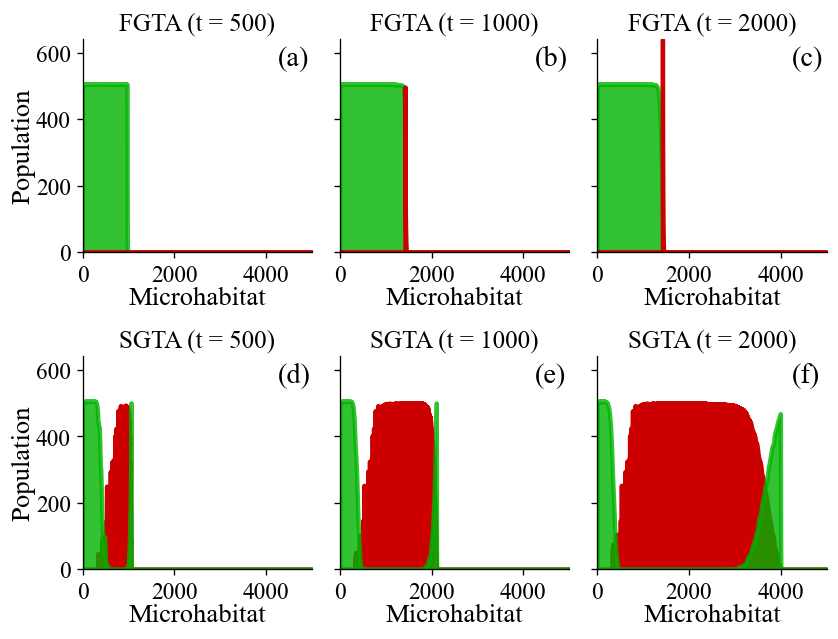

In [215]:
def plotAllContinuumDistbs(FGTA_live, FGTA_dead, FGTA_gRate, SGTA_live, SGTA_dead, SGTA_gRate):
    '''this is a massive mthod to make one figure for all the with death stuff. has the alive and dead populations for 
    three time values, the growth rates, and the % alive compositions for the FGTA and SGTA systems
    this one uses the continuum one'''
    
    max_value_pops = max(np.amax(FGTA_live[1:]), np.amax(FGTA_dead[1:]), np.amax(SGTA_live[1:]), np.amax(SGTA_dead[1:]))
    min_malue_pops = max(np.amin(FGTA_live[1:]), np.amin(FGTA_dead[1:]), np.amin(SGTA_live[1:]), np.amin(SGTA_dead[1:]))
    max_value_gRate = max(np.amax(FGTA_gRate[1:]), np.amax(SGTA_gRate[1:]))
    min_value_gRate = min(np.amin(FGTA_gRate[1:]), np.amin(SGTA_gRate[1:]))
    max_value_X = max(FGTA_live[0])
    
    
    # accent line colours for spatial and gRates
    linColour_alive = '#00b300'
    linColour_alive_accent = '#006600'
    linColour_dead = '#cc0000'
    linColour_dead_accent = '#660000'
    linColour_gRate = '#009999'
    linColour_gRate_accent = '#006666'
    
    # size and quality of the image
    #fig = plt.figure(figsize=(14, 16), dpi=400)
    fig = plt.figure(dpi=120)
    fig.set_size_inches(8,6)
    
    #use this to adjust the individual no. of gridspecs involved
    # this is the master gridspec which will have many nested gridspecs inside
    gs0 = gridspec.GridSpec(nrows=2, ncols=1, hspace=0.4)
    
    # here the individual subfigures are adjusted and spacing sorted out
    # this is the plots of the FGTA alive and dead over time
    #the notation is a bit shaky here, improve next time
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=6, subplot_spec=gs0[0], wspace=0.28)
    ax11 = fig.add_subplot(gs00[0:94, :2])
    ax12 = fig.add_subplot(gs00[0:94, 2:4], sharey=ax11)
    ax13 = fig.add_subplot(gs00[0:94, 4:], sharey=ax11)
    
    #this is SGTA alive and dead over time
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=6, subplot_spec=gs0[1], wspace=0.28)
    ax21 = fig.add_subplot(gs01[0:94, :2])
    ax22 = fig.add_subplot(gs01[0:94, 2:4], sharey=ax21)
    ax23 = fig.add_subplot(gs01[0:94, 4:], sharey=ax21)
    

    # combine all the axes into lists
    FGTA_axArr = [ax11, ax12, ax13]
    SGTA_axArr = [ax21, ax22, ax23]
    allAxArr = [ax11, ax12, ax13, ax21, ax22, ax23]
    
    # here the data is added to the plots
    lineWidthThicc = 2.4
    lineWidth = 2.6
    
    time1 = 500.
    time2 = 1000.
    time3 = 2000.
    timestep = 100.
    timeLabelList = [0, int(time1), int(time2), int(time3)]
    
    # this gets us the indexes of the total data corresponding to the desired cutoff times 
    get_tIndex = lambda time, timestep : int(time/timestep)+1
    
    tIndex1 = get_tIndex(time1, timestep)
    tIndex2 = get_tIndex(time2, timestep)
    tIndex3 = get_tIndex(time3, timestep)
    tIndexes = [tIndex1, tIndex2, tIndex3]
    
    #this is the FGTA and SGTA alive and dead over three time selections, t=500, 1000, 2000
    #these are remade so that only the selected indexes are plotted
    for i in range(0, len(tIndexes)):
        t_index = tIndexes[i]
        
                    
        SGTA_axArr[i].fill_between(SGTA_dead[0], 0, SGTA_dead[t_index], color=linColour_dead, linewidth=lineWidth)

        FGTA_axArr[i].fill_between(FGTA_live[0], 0, FGTA_live[t_index], color=linColour_alive, linewidth=lineWidth, alpha=0.8)
        SGTA_axArr[i].fill_between(SGTA_live[0], 0, SGTA_live[t_index], color=linColour_alive, linewidth=lineWidth, alpha=0.8)
        
        FGTA_axArr[i].fill_between(FGTA_dead[0], 0, FGTA_dead[t_index], color=linColour_dead, linewidth=lineWidth)

    ##############################################################################################################
    # now for the gRate ones
    #for i in range(1, len(FGTA_gRate)):
    #    if i%4==0:
    #        ax31.plot(FGTA_gRate[0], FGTA_gRate[i], color=linColour_gRate_accent, linewidth=lineWidth)
    #        ax32.plot(SGTA_gRate[0], SGTA_gRate[i], color=linColour_gRate_accent, linewidth=lineWidth)
    #        
    #    else:
    #        ax31.plot(FGTA_gRate[0], FGTA_gRate[i], color=linColour_gRate, linewidth=lineWidth)
    #        ax32.plot(SGTA_gRate[0], SGTA_gRate[i], color=linColour_gRate, linewidth=lineWidth)
    #        
    ###################################################################################################### 
    # gRate replaced so that it only plots the growth rates at the three time intervals from the 
    # above pop distbs, also includes the t=0 measurement

    # now the percentage alive ones
    FGTA_percentAlive, FGTA_popSize = getPercentAliveAndPopSizeOverTime(FGTA_live, FGTA_dead)
    SGTA_percentAlive, SGTA_popSize = getPercentAliveAndPopSizeOverTime(liveData=SGTA_live, deadData=SGTA_dead)
    t = [i for i in np.linspace(0., 2000., 21)]
    
    maxOverallPopSize = max(max(FGTA_popSize), max(SGTA_popSize))
    maxPercentAlive = max(max(FGTA_percentAlive), max(SGTA_percentAlive))
    percentColor = '#00994d'
    popColor = '#8600b3'
    
   
   
    ###########################################################################################
    # add labels, titles etc here 
    # these set the inner y labels invisible for neatness 
    plt.setp(ax12.get_yticklabels(), visible=False)
    plt.setp(ax13.get_yticklabels(), visible=False)
    plt.setp(ax22.get_yticklabels(), visible=False)
    plt.setp(ax23.get_yticklabels(), visible=False)

    
    # fontsizes
    titleSize = 15
    labelSize = 16
    numbersize = 14
    legendsize = 8.8
    IDsize=17
    
    
    # pop size distributions 
    for FGTA_ax, SGTA_ax, tLabel in zip(FGTA_axArr, SGTA_axArr, timeLabelList[1:]):
        #tLabel = (tIndex-1)*100
        FGTA_ax.set_title('FGTA (t = '+str(tLabel)+')', fontsize=titleSize)
        FGTA_ax.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
        FGTA_ax.set_xlim(0, max_value_X)
        FGTA_ax.set_ylim(0, max_value_pops)
        
        SGTA_ax.set_title('SGTA (t = '+str(tLabel)+')', fontsize=titleSize)
        SGTA_ax.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
        SGTA_ax.set_xlim(0, max_value_X)
        SGTA_ax.set_ylim(0, max_value_pops)
        
        
    FGTA_axArr[0].set_ylabel('Population', fontsize=labelSize, labelpad=0)
    SGTA_axArr[0].set_ylabel('Population', fontsize=labelSize, labelpad=0)
    
    
    ####################################################################################
    
    for ax in allAxArr:
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
    
    ax11.text(0.85, 0.88, '(a)', fontsize=IDsize, transform=ax11.transAxes)
    ax12.text(0.85, 0.88, '(b)', fontsize=IDsize, transform=ax12.transAxes)
    ax13.text(0.85, 0.88, '(c)', fontsize=IDsize, transform=ax13.transAxes)
    
    ax21.text(0.85, 0.88, '(d)', fontsize=IDsize, transform=ax21.transAxes)
    ax22.text(0.85, 0.88, '(e)', fontsize=IDsize, transform=ax22.transAxes)
    ax23.text(0.85, 0.88, '(f)', fontsize=IDsize, transform=ax23.transAxes)
    
    
    
    plt.savefig('Paper_figures/all_wDeathContinuum_distributionsNoisy-FINAL.pdf', bbox_inches='tight', dpi=330)
    plt.show()
    
plotAllContinuumDistbs(FGTA_continuum_aliveSpatialNoisy, FGTA_continuum_deadSpatialNoisy, FGTA_continuum_gRateNoisy, SGTA_continuum_aliveSpatialNoisy, SGTA_continuum_deadSpatialNoisy, SGTA_continuum_gRateNoisy)
#plotAllContinuumDistbs(FGTA_continuum_aliveSpatial, FGTA_continuum_deadSpatial, FGTA_continuum_gRate, SGTA_continuum_aliveSpatial, SGTA_continuum_deadSpatial, SGTA_continuum_gRate)   
    

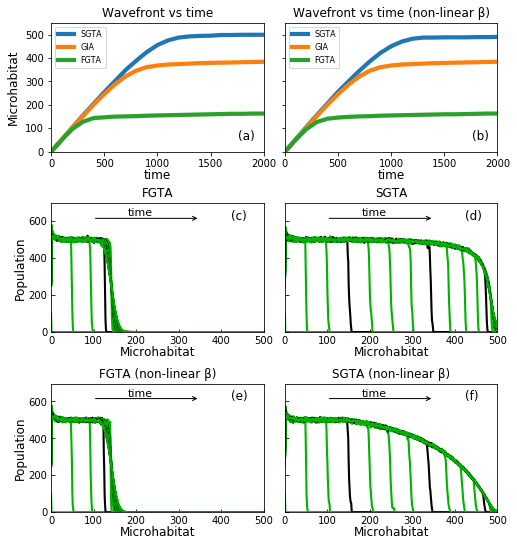

In [15]:
def nonLinearWavefrontsAndDistbs(FGTA_spat, SGTA_spat, FGTA_spatNL, SGTA_spatNL, GITA_spat):
    '''compares regular vs non-linear growth rates'''
    
    # max and min values of population and gRate distributions, used for fine tuning graphs
    max_value_Pops = max(np.amax(FGTA_spat[1:]), np.amax(SGTA_spat[1:]), np.amax(FGTA_spatNL[1:]), np.amax(SGTA_spatNL[1:]))
    min_value_Pops = min(np.amin(FGTA_spat[1:]), np.amin(FGTA_spatNL[1:]), np.amin(SGTA_spat[1:]), np.amin(SGTA_spatNL[1:]))
    max_value_X = max(np.amax(FGTA_spat[0]), np.amax(SGTA_spat[0]))
    
    # accent line colours for spatial and gRates
    linColour_spat = '#00b300'
    linColour_gRate = '#009999'
    
    # size and quality of the image
    #fig = plt.figure(figsize=(14, 12), dpi=400)
    fig = plt.figure()
    fig.set_size_inches(8,9)
    
    
    #use this to adjust the individual no. of gridspecs involved
    gs0 = gridspec.GridSpec(nrows=3, ncols=1, hspace=0.4)
    
    # here the individual subfigures are adjusted and spacing sorted out
    # this is the plots of wavefront positions for both growth functions
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs0[0], wspace=0.1)
    ax11 = fig.add_subplot(gs00[0, :1])
    ax12 = fig.add_subplot(gs00[0, 1:])
    
    #this is the population distributions over time
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs0[1], wspace=0.1)
    ax21 = fig.add_subplot(gs01[0, :1])
    ax22 = fig.add_subplot(gs01[0, 1:], sharey=ax21)
    
    # this is the gRate distributions over time
    gs02 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs0[2], wspace=0.1)
    ax31 = fig.add_subplot(gs02[0, :1])
    ax32 = fig.add_subplot(gs02[0, 1:], sharey=ax31)
    
    # combine all the axes into lists
    spatAxArr = [ax21, ax22]
    spatAxArrNL = [ax31, ax32]
    allSpatAxArr = spatAxArr+spatAxArrNL
    allAxArr = [ax11, ax12, ax21, ax22, ax31, ax32]
    
    # here the data is added to the plots
    lineWidthThicc = 4.2
    lineWidth = 2.1
    #this is the wavefront for regular beta comparisons
    FGTA_waves, GITA_waves, SGTA_waves, t = getWavefrontPositionsVsT(FGTA_spat, GITA_spat, SGTA_spat)
    maxWaveVal = max(max(FGTA_waves), max(GITA_waves), max(SGTA_waves))
    
    ax11.plot(t, SGTA_waves, linewidth=lineWidthThicc, label='SGTA')
    ax11.plot(t, GITA_waves, linewidth=lineWidthThicc, label='GIA')
    ax11.plot(t, FGTA_waves, linewidth=lineWidthThicc, label='FGTA')
    
    
    # this is the wavefront vs time section for non-linear beta
    FGTA_wavesNL, GITA_waves, SGTA_wavesNL, t = getWavefrontPositionsVsT(FGTA_spatNL, GITA_spat, SGTA_spatNL)
    maxWaveValNL = max(max(FGTA_wavesNL), max(GITA_waves), max(SGTA_wavesNL))
    
    ax12.plot(t, SGTA_wavesNL, linewidth=lineWidthThicc, label='SGTA')
    ax12.plot(t, GITA_waves, linewidth=lineWidthThicc, label='GIA')
    ax12.plot(t, FGTA_wavesNL, linewidth=lineWidthThicc, label='FGTA')
    
    
    # these are the population and growth rate distributions
    for i in range(1, len(FGTA_spat)):
        if i%4 == 0:
            ax21.plot(FGTA_spat[0], FGTA_spat[i], linewidth=lineWidth, color='black')
            ax22.plot(SGTA_spat[0], SGTA_spat[i], linewidth=lineWidth, color='black')
            
            ax31.plot(FGTA_spatNL[0], FGTA_spatNL[i], linewidth=lineWidth, color='black')
            ax32.plot(SGTA_spatNL[0], SGTA_spatNL[i], linewidth=lineWidth, color='black')
        else:
            ax21.plot(FGTA_spat[0], FGTA_spat[i], linewidth=lineWidth, color=linColour_spat)
            ax22.plot(SGTA_spat[0], SGTA_spat[i], linewidth=lineWidth, color=linColour_spat)
            
            ax31.plot(FGTA_spat[0], FGTA_spatNL[i], linewidth=lineWidth, color=linColour_spat)
            ax32.plot(SGTA_spat[0], SGTA_spatNL[i], linewidth=lineWidth, color=linColour_spat)
    
    # here the formatting and titles etc is done
    # these set the inner y labels invisible for neatness 
    plt.setp(ax12.get_yticklabels(), visible=False)
    plt.setp(ax22.get_yticklabels(), visible=False)
    plt.setp(ax32.get_yticklabels(), visible=False)
    
    # sets correct x and y lims and adds time arrows
    # this is the graphs for the population distributions
    for ax in allSpatAxArr:
        ax.set_xlim(0, 500)
        ax.set_ylim(min_value_Pops+(0.1*min_value_Pops), max_value_Pops+(0.2*max_value_Pops))
        ax.tick_params(direction='in')
        # below code adds an arrow above the graphs indicating the direction of time
        ax.annotate('', xy=(0.7*max_value_X, 1.06*max_value_Pops), xytext=(0.2*max_value_X, 1.06*max_value_Pops), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 1.08*max_value_Pops, 'time', fontsize=11)

    
    # add labels, titles etc here 
    titleSize = 12
    labelSize = 12
    numbersize = 10
    legendsize = 8
    IDsize=12
    
    # this is for all the axes, to make the number fonts bigger
    for ax in allAxArr:
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
    
    ax11.set_title('Wavefront vs time', fontsize=titleSize)
    ax11.set_xlabel('time', fontsize=labelSize, labelpad=0)
    ax11.set_ylabel('Microhabitat', fontsize=labelSize, labelpad=5)
    ax11.set_xlim(0, 2000)
    ax11.set_ylim(0, 1.1*maxWaveVal)
    ax11.legend(loc='upper left', fontsize=legendsize)
    
    ax12.set_xlim(0, 2000)
    ax12.set_ylim(0, 1.1*maxWaveVal)
    ax12.set_title('Wavefront vs time (non-linear β)', fontsize=titleSize)
    ax12.set_xlabel('time', fontsize=labelSize, labelpad=0)
    ax12.legend(loc='upper left', fontsize=legendsize)
    
    ax21.set_title('FGTA', fontsize=titleSize)
    ax21.set_ylabel('Population', fontsize=labelSize, labelpad=2)
    ax21.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax22.set_title('SGTA', fontsize=titleSize)
    ax22.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    
    ax31.set_title('FGTA (non-linear β)', fontsize=titleSize)
    ax31.set_ylabel('Population', fontsize=labelSize, labelpad=2)
    ax31.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax32.set_title('SGTA (non-linear β)', fontsize=titleSize)
    ax32.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    
    
    ax11.text(0.88*t[-1], 0.1*SGTA_waves[-1], '(a)', fontsize=IDsize)
    ax12.text(0.88*t[-1], 0.1*SGTA_waves[-1], '(b)', fontsize=IDsize)
    
    ax21.text(0.85*max_value_X, 1.05*max_value_Pops, '(c)', fontsize=IDsize)
    ax22.text(0.85*max_value_X, 1.05*max_value_Pops, '(d)', fontsize=IDsize)
    
    ax31.text(0.85*max_value_X, 1.05*max_value_Pops, '(e)', fontsize=IDsize)
    ax32.text(0.85*max_value_X, 1.05*max_value_Pops, '(f)', fontsize=IDsize)
    
    #fig.tight_layout()
    #plt.tight_layout()
    plt.savefig('non_linear_beta_comparisons.pdf', bbox_inches='tight')
    plt.show()


nonLinearWavefrontsAndDistbs(FGTA_linBeta_spatial, SGTA_linBeta_spatial, FGTA_nonLinBeta_spatial, SGTA_nonLinBeta_spatial, GITA_simple_alpha_specificAlpha_spatial) 
#fig3_distbs_wavfronPos_grad(FGTA_simple_alpha_specificAlpha_spatial, GITA_simple_alpha_specificAlpha_spatial, SGTA_simple_alpha_specificAlpha_spatial, FGTA_simple_alpha_specificAlpha_gRate, GITA_simple_alpha_specificAlpha_gRate, SGTA_simple_alpha_specificAlpha_gRate)

In [207]:
def plotTotalNOverTime(FGTA_spat, SGTA_spat, FGTANL_spat,  SGTANL_spat):
    
    FGTA_Nvt = np.sum(FGTA_spat[1:], axis=1) #total N over time for FGTA linear beta
    SGTA_Nvt = np.sum(SGTA_spat[1:], axis=1)
    FGTANL_Nvt = np.sum(FGTANL_spat[1:], axis=1)
    SGTANL_Nvt = np.sum(SGTANL_spat[1:], axis=1)
    t = [i for i in np.linspace(0., 2000., 21)]
    
    linColour_spat = '#00b300'
    lineWidth = 2.1
    titleSize = 12
    labelSize = 12
    numbersize = 10
    legendsize = 8
    IDsize=12
    fig = plt.figure()
    fig.set_size_inches(8,4)
    
    
    # this is the master gridspec which will have many nested gridspecs inside
    gs0 = gridspec.GridSpec(nrows=1, ncols=1, hspace=0.35)
    #this is the pops over time for the normal and its mnon-linear beta counterpart
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs0[0], wspace=0.1)
    ax11 = fig.add_subplot(gs00[0, :1])
    ax12 = fig.add_subplot(gs00[0, 1:], sharey=ax11)
    
    ax11.plot(t, SGTA_Nvt, linewidth=lineWidth, label='SGTA')
    ax11.plot(t, FGTA_Nvt, linewidth=lineWidth, label='FGTA')
    
    ax12.plot(t, SGTANL_Nvt, linewidth=lineWidth, label='SGTA')
    ax12.plot(t, FGTANL_Nvt, linewidth=lineWidth, label='FGTA')
    
    plt.setp(ax12.get_yticklabels(), visible=False)
    ax11.xaxis.set_tick_params(labelsize=numbersize)
    ax12.xaxis.set_tick_params(labelsize=numbersize)
    ax11.set_title('N vs t', fontsize=titleSize)
    ax11.set_xlabel('time', fontsize=labelSize)
    ax11.set_ylabel('N', fontsize=labelSize)
    ax11.legend(loc='lower right', fontsize=legendsize)
    
    ax12.set_title('N vs t (non-linear β)')
    ax12.set_xlabel('time', fontsize=labelSize)
    ax12.legend(loc='lower right', fontsize=legendsize)
    
    
    plt.savefig('non_linear_beta_PopSize_comparisons.pdf', bbox_inches='tight')
    plt.show()
            
    
    
    

#plotTotalNOverTime(FGTA_linBeta_spatial, SGTA_linBeta_spatial, FGTA_nonLinBeta_spatial, SGTA_nonLinBeta_spatial)

In [206]:
def uniform_c_poster(FGTA_c_spatial_list, GITA_c_spatial_list, SGTA_c_spatial_list):
    # unpack the lists here
    FGTA_02_spat, FGTA_05_spat, FGTA_08_spat, FGTA_1_spat, FGTA_2_spat, FGTA_3_spat, FGTA_4_spat, FGTA_5_spat, FGTA_6_spat, FGTA_8_spat, FGTA_10_spat = FGTA_c_spatial_list    
    GITA_02_spat, GITA_05_spat, GITA_08_spat, GITA_1_spat, GITA_2_spat, GITA_3_spat, GITA_4_spat, GITA_5_spat, GITA_6_spat, GITA_8_spat, GITA_10_spat = GITA_c_spatial_list
    SGTA_02_spat, SGTA_05_spat, SGTA_08_spat, SGTA_1_spat, SGTA_2_spat, SGTA_3_spat, SGTA_4_spat, SGTA_5_spat, SGTA_6_spat, SGTA_8_spat, SGTA_10_spat = SGTA_c_spatial_list
    
    def getMaxValInArray(list_of_arrays):
        
        max_list = []
        for listo in list_of_arrays:
            max_val = np.amax(listo[1:])
            max_list.append(max_val)
            
        return max(max_list)
        
    max_value_pops = max(getMaxValInArray(FGTA_c_spatial_list), getMaxValInArray(SGTA_c_spatial_list))
    min_value_pops = min(min(map(np.amin, FGTA_c_spatial_list)), min(map(np.amin, SGTA_c_spatial_list)))
    max_value_X = 500
    
    # accent line colours for spatial and gRates
    linColour_alive = '#00b300'
    linColour_alive_accent = '#006600'
    linColour_dead = '#cc0000'
    linColour_dead_accent = '#660000'
    linColour_gRate = '#009999'
    linColour_gRate_accent = '#006666'
    # linewidths
    lineWidthThicc = 4.2
    lineWidth = 2.
    # fontsizes
    titleSize = 12
    labelSize = 11
    numbersize = 10
    legendsize = 8
    IDsize=11
    
    # size and quality of the image
    #fig = plt.figure(figsize=(15, 18), dpi=400)
    fig = plt.figure(dpi=1200)
    fig.set_size_inches(8,6)
    
    #use this to adjust the individual no. of gridspecs involved
    # this is the master gridspec which will have many nested gridspecs inside
    gs0 = gridspec.GridSpec(nrows=100, ncols=1, hspace=0.45)
    
    #this is the spatial dstbs for c = 1.0
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[0:36], wspace=0.2)
    ax11 = fig.add_subplot(gs00[:, :2])
    ax12 = fig.add_subplot(gs00[:, 2:4], sharey=ax11)
    ax13 = fig.add_subplot(gs00[:, 4:], sharey=ax11)
    
    
    # wavespeeds and wavespeeds sq
    gs03 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=100, subplot_spec=gs0[47:], wspace=0.2)
    ax41 = fig.add_subplot(gs03[0:, :45]) # v vs c/b
    ax43 = fig.add_subplot(gs03[0:, 55:]) # v^2 vs (c/b)^2
    ax42 = axins2 = inset_axes(ax43, width="45%", height="45%", loc=1, borderpad=1.) # v^2 vs c^2 (inset)
    
    FGTA_beta_max = 10. - 9.*(1e6/(33+1e6))
    GITA_beta_max = 5.
    SGTA_beta_max = 1. + 9.*(1e6/(33+1e6))
    
    
    allDistbAxArr = [ax11, ax12, ax13]
    allPopAxArr = [ax11, ax12, ax13]
    #allGRateAxArr = [ax41, ax42, ax43]
    #allWavespeedAxArr = [ax51, ax52, ax53]
    concentrations_list = [0.2, 0.5, 0.8, 1., 2., 3., 4., 5., 6., 8., 10.]
    # the scaled lists here are for plotting v vs c/beta_max
    FGTA_beta_scaled_c = [c/FGTA_beta_max for c in concentrations_list]
    GITA_beta_scaled_c = [c/GITA_beta_max for c in concentrations_list]
    SGTA_beta_scaled_c = [c/SGTA_beta_max for c in concentrations_list]
    concentrations_list_sq = [c**2 for c in concentrations_list]
    FGTA_beta_scaled_c_sq = [(c/FGTA_beta_max)**2 for c in concentrations_list]
    GITA_beta_scaled_c_sq = [(c/GITA_beta_max)**2 for c in concentrations_list]
    SGTA_beta_scaled_c_sq = [(c/SGTA_beta_max)**2 for c in concentrations_list]
    
    
    def plotDistributions(axis, data, lineColour, lineThickness, title='bla'):
        
        counter = 0
        for i in range(1, len(data)):
            if counter%4 == 0:
                axis.plot(data[0], data[i], linewidth=lineWidth+0.2, color='black')
            else:
                axis.plot(data[0], data[i], linewidth=lineWidth, color=lineColour)
            counter+=1     
        axis.set_title(title, fontsize=titleSize)
          
            
    def getWaveSpeeds(spatData):
        popThreshold = 20
        spatData_wavefronts = []
        spatData_wavespeeds = []
        timestep = 100.
        #here we iterate over the input data and get the max indices of the data where the population
        #is above a certain threshold. this gives us the wavefron position over time
        for i in range(1, len(spatData)):
            if any(pop > popThreshold for pop in spatData[i]):
                spatData_wavefronts.append(max((x, y) for x, y in enumerate(spatData[i]) if y > popThreshold)[0])
            else:
                spatData_wavefronts.append(0)
                
        #print(spatData_wavefronts)
        spatData_wavefronts = [x for x in spatData_wavefronts if x < 499]
        for i in range(1, len(spatData_wavefronts)):
            speed = (spatData_wavefronts[i]-spatData_wavefronts[i-1])/timestep
            spatData_wavespeeds.append(speed)
            
        return spatData_wavespeeds
    
    
    def getAvgSpeed(waveSpeedList):
        
        filtered_list = [s for s in waveSpeedList if s>0.]
        return np.mean(filtered_list)
    
    t_speeds = np.linspace(0, 2000., 20)
    
    all_FGTA_speeds = [getWaveSpeeds(spat) for spat in FGTA_c_spatial_list]
    #print(all_FGTA_speeds)
    FGTA_v_vs_c = [getAvgSpeed(v) for v in all_FGTA_speeds]
    FGTA_vSq_vs_cSq = [v**2 for v in FGTA_v_vs_c]
    
    all_GITA_speeds = [getWaveSpeeds(spat) for spat in GITA_c_spatial_list]
    GITA_v_vs_c = [getAvgSpeed(v) for v in all_GITA_speeds]
    GITA_vSq_vs_cSq = [v**2 for v in GITA_v_vs_c]
    
    all_SGTA_speeds = [getWaveSpeeds(spat) for spat in SGTA_c_spatial_list]
    SGTA_v_vs_c = [getAvgSpeed(v) for v in all_SGTA_speeds]
    SGTA_vSq_vs_cSq = [v**2 for v in SGTA_v_vs_c]
    
    max_wavespeed_val = max(max(FGTA_v_vs_c), max(GITA_v_vs_c), max(SGTA_v_vs_c))
    max_wavespeedSq_val = max(max(FGTA_vSq_vs_cSq), max(GITA_vSq_vs_cSq), max(SGTA_vSq_vs_cSq))
    max_concn_val = max(concentrations_list)
    max_conc_beta_val = max(max(FGTA_beta_scaled_c), max(GITA_beta_scaled_c), max(SGTA_beta_scaled_c))
    max_concSq_val = max(concentrations_list_sq)
    max_concSq_bSq_val =  max(max(FGTA_beta_scaled_c_sq), max(GITA_beta_scaled_c_sq), max(SGTA_beta_scaled_c_sq))
    

            
    # data plotted here 
    plotDistributions(ax11, FGTA_1_spat, linColour_alive, lineWidth, 'FGTA (c = 1.0)')
    plotDistributions(ax12, GITA_1_spat, linColour_alive, lineWidth, 'GIA (c = 1.0)')
    plotDistributions(ax13, SGTA_1_spat, linColour_alive, lineWidth, 'SGTA (c = 1.0)')
    

    marker_size = 6
    ax41.plot(SGTA_beta_scaled_c, SGTA_v_vs_c, linewidth=lineWidth, label='SGTA', marker='o', markersize=marker_size)
    ax41.plot(GITA_beta_scaled_c, GITA_v_vs_c, linewidth=lineWidth, label='GIA', marker='^', markersize=marker_size)
    ax41.plot(FGTA_beta_scaled_c, FGTA_v_vs_c, linewidth=lineWidth, label='FGTA', marker='s', markersize=marker_size)
    
    ax42.semilogx(concentrations_list_sq, SGTA_vSq_vs_cSq, linewidth=lineWidth, label='SGTA', marker='o', markersize=marker_size)
    ax42.semilogx(concentrations_list_sq, GITA_vSq_vs_cSq, linewidth=lineWidth, label='GIA', marker='^', markersize=marker_size)
    ax42.semilogx(concentrations_list_sq, FGTA_vSq_vs_cSq, linewidth=lineWidth, label='FGTA', marker='s', markersize=marker_size)
    
    ax43.plot(SGTA_beta_scaled_c_sq, SGTA_vSq_vs_cSq, linewidth=lineWidth, label='SGTA', marker='o', markersize=marker_size)
    ax43.plot(GITA_beta_scaled_c_sq, GITA_vSq_vs_cSq, linewidth=lineWidth, label='GIA', marker='^', markersize=marker_size)
    ax43.plot(FGTA_beta_scaled_c_sq, FGTA_vSq_vs_cSq, linewidth=lineWidth, label='FGTA', marker='s', markersize=marker_size)
    
    
    # graph formatting etc here
    plt.setp(ax12.get_yticklabels(), visible=False)
    plt.setp(ax13.get_yticklabels(), visible=False)
    plt.setp(ax42.get_yticklabels(), visible=False)
    #plt.setp(ax42.get_xticklabels(), visible=False)

    for ax in allDistbAxArr:
        ax.set_xlim(0, 500)
        ax.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
        # below code adds an arrow above the graphs indicating the direction of time
        ax.annotate('', xy=(0.7*max_value_X, 0.94*max_value_pops), xytext=(0.2*max_value_X, 0.94*max_value_pops), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 0.98*max_value_pops, 'time', fontsize=14)
        
    
    for ax in allPopAxArr:
        ax.set_ylim(0, 1.1*max_value_pops)

        
        
    ax11.set_ylabel('Population', fontsize=labelSize, labelpad=0)
    
    ax41.set_ylabel('v', fontsize=labelSize)
    ax41.set_xlabel('c/β$_{\max}$', fontsize=labelSize, labelpad=0)
    ax41.xaxis.set_tick_params(labelsize=numbersize)
    ax41.yaxis.set_tick_params(labelsize=numbersize)
    ax41.set_xlim(0, 1.5)
    ax41.set_ylim(0, 1.1*max_wavespeed_val)
    ax41.legend(loc='lower left', fontsize=legendsize)
    
    ax42.set_ylabel('v$^2$', fontsize=labelSize-1, labelpad=0)
    ax42.set_xlabel('c$^2$', fontsize=labelSize-1, labelpad=0)
    ax42.xaxis.set_tick_params(labelsize=numbersize-1)
    ax42.yaxis.set_tick_params(labelsize=numbersize-1)
    ax42.set_xlim(0, max_concSq_val)
    ax42.set_ylim(0, 1.1*max_wavespeedSq_val)
    #ax42.legend(loc='upper right', fontsize=legendsize)
    
    #ax43.yaxis.set_label_position("right")
    #ax43.yaxis.tick_right()
    ax43.set_ylabel('v$^2$', fontsize=labelSize, labelpad=0)
    ax43.set_xlabel('c$^2$/β$_{\max}^2$', fontsize=labelSize, labelpad=0)
    ax43.xaxis.set_tick_params(labelsize=numbersize)
    ax43.yaxis.set_tick_params(labelsize=numbersize)
    ax43.set_xlim(0, 1.5)
    ax43.set_ylim(0, 1.1*max_wavespeedSq_val)
    #ax43.legend(loc='upper right', fontsize=legendsize)
    
    pops_h = 0.96
    gRate_h = 1.06
    wave_h = 0.98
    v_h = 0.98
    x_offset = 0.88
    
    ax11.text(x_offset*max_value_X, pops_h*max_value_pops, '(a)', fontsize=IDsize)
    ax12.text(x_offset*max_value_X, pops_h*max_value_pops, '(b)', fontsize=IDsize)
    ax13.text(x_offset*max_value_X, pops_h*max_value_pops, '(c)', fontsize=IDsize)
    
    ax41.text(1.36*max(SGTA_beta_scaled_c), v_h*max_wavespeed_val, '(d)', fontsize=IDsize) 
    ax43.text(1.36*max(SGTA_beta_scaled_c_sq), 0.08*max_wavespeedSq_val, '(e)', fontsize=IDsize)
    
    #ax41.text(0.94*max_concn_val, wave_h*max_wavespeed_val, '(j)', fontsize=IDsize) 
    
    plt.savefig('uniform_c_distbs(no_gRate)_and_wavespeeds-POSTER.png', bbox_inches='tight')
    plt.show()
    
#uniform_c_poster(uniform_FGTA_spatial_list, uniform_GITA_spatial_list, uniform_SGTA_spatial_list)


In [205]:
def plotSeparatedBetasOverTime_poster():
    
    #fig = plt.figure(dpi=300)
    fig = plt.figure(dpi=300)
    fig.set_size_inches(14,4.6)
    gs = gridspec.GridSpec(nrows=100, ncols=6)
    plt.gcf().subplots_adjust(bottom=0.2)
    
    ax11 = fig.add_subplot(gs[:, :2])
    ax12 = fig.add_subplot(gs[:, 2:4], sharey=ax11)
    ax13 = fig.add_subplot(gs[:, 4:], sharey=ax11)
    
    allAxArr = [ax11, ax12, ax13]
    
    K = 33.
    S_max = 500
    mu_max = S_max/(K + S_max)
    
    S = list(range(500, 0, -1))
    mu = [x/y for x, y in zip(S, [K+s for s in S])]
    #print(mu)
    betaFGTA = [10. - 9.*m/mu_max for m in mu]
    betaGITA = [5 for m in mu]
    betaSGTA = [1. + 9.*m/mu_max for m in mu]
    
    lineWidth = 3.6
    FGTA_color = '#ef630b'
    GITA_color = '#5924cc'
    SGTA_color = '#b70c9d'
    
    lineFGTA = ax11.plot(mu, betaFGTA, label = 'FGTA', linewidth=lineWidth, color=FGTA_color)[0]
    lineGITA = ax12.plot(mu, betaGITA, label = 'GIA', linewidth=lineWidth, color=GITA_color)[0]
    lineSGTA = ax13.plot(mu, betaSGTA, label = 'SGTA', linewidth=lineWidth, color=SGTA_color)[0]
    
    add_arrow(lineFGTA, position=0.2, size=30, lineWidth=lineWidth)
    add_arrow(lineGITA, position=0.2, size=30, lineWidth=lineWidth)
    add_arrow(lineSGTA, position=0.2, size=30, lineWidth=lineWidth)
    add_arrow(lineFGTA, position=0.8, size=30, lineWidth=lineWidth)
    add_arrow(lineGITA, position=0.8, size=30, lineWidth=lineWidth)
    add_arrow(lineSGTA, position=0.8, size=30, lineWidth=lineWidth)
    
    
    plt.setp(ax12.get_yticklabels(), visible=False)
    plt.setp(ax12.get_yticklines(), visible=False)
    plt.setp(ax13.get_yticklabels(), visible=False)
    plt.setp(ax13.get_yticklines(), visible=False)
    
    font_size=24
    label_size=20
    ax11.set_ylabel('MIC', fontsize=font_size, labelpad=0)
    ax11.set_xlabel('g(s)', fontsize=font_size, labelpad=0)
    ax12.set_xlabel('g(s)', fontsize=font_size, labelpad=0)
    ax13.set_xlabel('g(s)', fontsize=font_size, labelpad=0)
    
    ax11.set_title('FGTA', fontsize=font_size)
    ax12.set_title('GIA', fontsize=font_size)
    ax13.set_title('SGTA', fontsize=font_size)
    
    for ax in allAxArr:
        ax.set_xlim(0., 0.98)
        ax.set_ylim(0, 10.5)
        ax.xaxis.set_tick_params(labelsize=label_size)
        ax.yaxis.set_tick_params(labelsize=label_size)
        ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    
    plt.savefig('seperated_betas_over_time-POSTER.jpeg', bbox_inches='tight')
    
    
#plotSeparatedBetasOverTime_poster()

In [204]:
def plotContinuumDeath_poster(FGTA_live, FGTA_dead, FGTA_gRate, SGTA_live, SGTA_dead, SGTA_gRate):
    '''this is a massive mthod to make one figure for all the with death stuff. has the alive and dead populations for 
    three time values, the growth rates, and the % alive compositions for the FGTA and SGTA systems
    this one uses the continuum one'''
    
    max_value_pops = max(np.amax(FGTA_live[1:]), np.amax(FGTA_dead[1:]), np.amax(SGTA_live[1:]), np.amax(SGTA_dead[1:]))
    min_malue_pops = max(np.amin(FGTA_live[1:]), np.amin(FGTA_dead[1:]), np.amin(SGTA_live[1:]), np.amin(SGTA_dead[1:]))
    max_value_gRate = max(np.amax(FGTA_gRate[1:]), np.amax(SGTA_gRate[1:]))
    min_value_gRate = min(np.amin(FGTA_gRate[1:]), np.amin(SGTA_gRate[1:]))
    max_value_X = max(FGTA_live[0])
    
    
    # accent line colours for spatial and gRates
    linColour_alive = '#00b300'
    linColour_alive_accent = '#006600'
    linColour_dead = '#cc0000'
    linColour_dead_accent = '#660000'
    linColour_gRate = '#009999'
    linColour_gRate_accent = '#006666'
    
    # size and quality of the image
    #fig = plt.figure(figsize=(14, 16), dpi=400)
    fig = plt.figure(dpi=1200)
    fig.set_size_inches(14,12)
    
    lineWidth = 3.6
    # fontsizes
    titleSize = 18
    labelSize = 16
    numbersize = 15
    legendsize = 14
    IDsize=16
    
    #use this to adjust the individual no. of gridspecs involved
    # this is the master gridspec which will have many nested gridspecs inside
    gs0 = gridspec.GridSpec(nrows=99, ncols=1, hspace=0.2)
    
    # here the individual subfigures are adjusted and spacing sorted out
    # this is the plots of the FGTA alive and dead over time
    #the notation is a bit shaky here, improve next time
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=6, subplot_spec=gs0[:27], wspace=0.2)
    ax11 = fig.add_subplot(gs00[0:94, :2])
    ax12 = fig.add_subplot(gs00[0:94, 2:4], sharey=ax11)
    ax13 = fig.add_subplot(gs00[0:94, 4:], sharey=ax11)
    
    #this is SGTA alive and dead over time
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=6, subplot_spec=gs0[34:61], wspace=0.2)
    ax21 = fig.add_subplot(gs01[0:94, :2])
    ax22 = fig.add_subplot(gs01[0:94, 2:4], sharey=ax21)
    ax23 = fig.add_subplot(gs01[0:94, 4:], sharey=ax21)
    
    #this is the two percent alive plots
    gs03 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=100, subplot_spec=gs0[68:], wspace=0.3)
    ax41 = fig.add_subplot(gs03[0, :46])
    ax42 = fig.add_subplot(gs03[0, 54:], sharey=ax41)
    

    # combine all the axes into lists
    FGTA_axArr = [ax11, ax12, ax13]
    SGTA_axArr = [ax21, ax22, ax23]
    percentAxArr = [ax41, ax42]
    allAxArr = [ax11, ax12, ax13, ax21, ax22, ax23, ax41, ax42]
    
    # here the data is added to the plot
    time1 = 500.
    time2 = 1000.
    time3 = 2000.
    timestep = 100.
    timeLabelList = [0., time1, time2, time3]
    
    # this gets us the indexes of the total data corresponding to the desired cutoff times 
    get_tIndex = lambda time, timestep : int(time/timestep)+1
    
    tIndex1 = get_tIndex(time1, timestep)
    tIndex2 = get_tIndex(time2, timestep)
    tIndex3 = get_tIndex(time3, timestep)
    tIndexes = [tIndex1, tIndex2, tIndex3]
    
    #this is the FGTA and SGTA alive and dead over three time selections, t=500, 1000, 2000
    #these are remade so that only the selected indexes are plotted
    for i in range(0, len(tIndexes)):
        t_index = tIndexes[i]
        
        FGTA_axArr[i].fill_between(FGTA_dead[0], 0,FGTA_dead[t_index], color=linColour_dead, linewidth=lineWidth)            
        SGTA_axArr[i].fill_between(SGTA_dead[0],0, SGTA_dead[t_index], color=linColour_dead, linewidth=lineWidth)

        FGTA_axArr[i].fill_between(FGTA_live[0],0, FGTA_live[t_index], color=linColour_alive, linewidth=lineWidth)
        SGTA_axArr[i].fill_between(SGTA_live[0],0, SGTA_live[t_index], color=linColour_alive, linewidth=lineWidth)


    # now the percentage alive ones
    FGTA_percentAlive, FGTA_popSize = getPercentAliveAndPopSizeOverTime(FGTA_live, FGTA_dead)
    SGTA_percentAlive, SGTA_popSize = getPercentAliveAndPopSizeOverTime(liveData=SGTA_live, deadData=SGTA_dead)
    t = [i for i in np.linspace(0., 2000., 21)]
    
    maxOverallPopSize = max(max(FGTA_popSize), max(SGTA_popSize))
    maxPercentAlive = max(max(FGTA_percentAlive), max(SGTA_percentAlive))
    percentColor = '#00994d'
    popColor = '#8600b3'
    
    def two_scales(ax1, time, data1, data2, c1, c2):
        ax2 = ax1.twinx()
        ax1.plot(time, data1, color=c1, linewidth=lineWidth)
        ax1.set_xlabel('time', fontsize=12)
        ax1.set_ylim(0., 105.)
        
        ax2.plot(time, data2, color=c2, linewidth=lineWidth)
        ax2.set_ylim(0., 1.1*maxOverallPopSize)
        return ax1, ax2
    
    
    ax41, ax41a = two_scales(ax41, t, FGTA_percentAlive, FGTA_popSize, percentColor, popColor)
    ax42, ax42a = two_scales(ax42, t, SGTA_percentAlive, SGTA_popSize, percentColor, popColor)
    
    allAxArr.extend([ax41a, ax42a])
    
    # Change color of each axis
    def color_y_axis(ax, color):
        """Color your axes."""
        for yt in ax.get_yticklabels():
            yt.set_color(color)

    color_y_axis(ax41, percentColor)
    color_y_axis(ax41a, popColor)
    color_y_axis(ax42, percentColor)
    color_y_axis(ax42a, popColor)
    
   
    ###########################################################################################
    # add labels, titles etc here 
    # these set the inner y labels invisible for neatness 
    plt.setp(ax12.get_yticklabels(), visible=False)
    plt.setp(ax13.get_yticklabels(), visible=False)
    plt.setp(ax22.get_yticklabels(), visible=False)
    plt.setp(ax23.get_yticklabels(), visible=False)


    
    # pop size distributions 
    for FGTA_ax, SGTA_ax, tLabel in zip(FGTA_axArr, SGTA_axArr, timeLabelList[1:]):
        #tLabel = (tIndex-1)*100
        FGTA_ax.set_title('FGTA (t = '+str(tLabel)+')', fontsize=titleSize)
        FGTA_ax.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
        FGTA_ax.set_xlim(0, max_value_X)
        FGTA_ax.set_ylim(0, max_value_pops)
        
        SGTA_ax.set_title('SGTA (t = '+str(tLabel)+')', fontsize=titleSize)
        SGTA_ax.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
        SGTA_ax.set_xlim(0, max_value_X)
        SGTA_ax.set_ylim(0, max_value_pops)
        
        
    FGTA_axArr[0].set_ylabel('Population', fontsize=labelSize, labelpad=0)
    SGTA_axArr[0].set_ylabel('Population', fontsize=labelSize, labelpad=0)
    
    ax41.set_title('FGTA', fontsize=titleSize)
    ax41.set_xlabel('time', fontsize=labelSize, labelpad=0)
    ax41.set_xlim(0, max(t))
    ax41.set_ylabel('% alive', fontsize=labelSize, color=percentColor, labelpad=0)
    ax41a.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax41a.yaxis.offsetText.set_fontsize(labelSize)
    ax41a.yaxis.get_offset_text().set_visible(False) # removes the 1e5 from the top corner of the plot
    
    ax42.set_title('SGTA', fontsize=titleSize)
    ax42.set_xlabel('time', fontsize=labelSize, labelpad=0)
    ax42a.set_ylabel('Population size (x10$^5$)', fontsize=labelSize, color=popColor)
    ax42.set_xlim(0, max(t))
    # this makes the axis in scientific notation. the next line makes the 1e5 bigger
    ax42a.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax42a.yaxis.offsetText.set_fontsize(labelSize)
    ax42a.yaxis.get_offset_text().set_visible(False)
    ####################################################################################
    
    for ax in allAxArr:
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
        ax.tick_params(direction='in')
        ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    
    x_offset = 0.88
    t_offset = 0.92
    ax11.text(x_offset*max_value_X, 0.88*max_value_pops, '(a)', fontsize=IDsize)
    ax12.text(x_offset*max_value_X, 0.88*max_value_pops, '(b)', fontsize=IDsize)
    ax13.text(x_offset*max_value_X, 0.88*max_value_pops, '(c)', fontsize=IDsize)
    
    ax21.text(x_offset*max_value_X, 0.88*max_value_pops, '(d)', fontsize=IDsize)
    ax22.text(x_offset*max_value_X, 0.88*max_value_pops, '(e)', fontsize=IDsize)
    ax23.text(x_offset*max_value_X, 0.88*max_value_pops, '(f)', fontsize=IDsize)
    
    ax41.text(t_offset*max(t), 0.06*maxPercentAlive, '(g)', fontsize=IDsize)
    ax42.text(t_offset*max(t), 0.06*maxPercentAlive, '(h)', fontsize=IDsize)
    
    
    
    plt.savefig('all_wDeathContinuum_distributions-POSTER.png', bbox_inches='tight')
    plt.show()
    
#plotContinuumDeath_poster(FGTA_continuum_aliveSpatialNoisy, FGTA_continuum_deadSpatialNoisy, FGTA_continuum_gRateNoisy, SGTA_continuum_aliveSpatialNoisy, SGTA_continuum_deadSpatialNoisy, SGTA_continuum_gRateNoisy)
#plotAllContinuumDistbs(FGTA_continuum_aliveSpatial, FGTA_continuum_deadSpatial, FGTA_continuum_gRate, SGTA_continuum_aliveSpatial, SGTA_continuum_deadSpatial, SGTA_continuum_gRate)   
    

In [203]:
def exponentialGradient_poster(FGTA_spat, GITA_spat, SGTA_spat):
    '''this is the big method to make figure 3? which has the pop and gRate distbs for the simple 
    growth curves, specific alpha, no death. also has '''
    
    # max and min values of population and gRate distributions, used for fine tuning graphs
    max_value_Pops = max(np.amax(FGTA_spat[1:]), np.amax(GITA_spat[1:]), np.amax(SGTA_spat[1:]))
    min_value_Pops = min(np.amin(FGTA_spat[1:]), np.amin(GITA_spat[1:]), np.amin(SGTA_spat[1:]))
    max_value_X = max(np.amax(FGTA_spat[0]), np.amax(GITA_spat[0]), np.amax(SGTA_spat[0]))
    
    # accent line colours for spatial and gRates
    linColour_spat = '#00b300'
    linColour_gRate = '#009999'
    
    # size and quality of the image
    #fig = plt.figure(figsize=(14, 12), dpi=400)
    fig = plt.figure(dpi=1200)
    fig.set_size_inches(14,9)
    
    lineWidth = 3.2
    # fontsizes
    titleSize = 18
    labelSize = 16
    numbersize = 15
    legendsize = 14
    IDsize=16
    
    #use this to adjust the individual no. of gridspecs involved
    gs0 = gridspec.GridSpec(nrows=2, ncols=1, hspace=0.3)
    
    # here the individual subfigures are adjusted and spacing sorted out
    # this is the plots of wavefront position and antibiotic gradient
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=100, subplot_spec=gs0[0], wspace=0.6)
    ax11 = fig.add_subplot(gs00[0, :47])
    ax12 = fig.add_subplot(gs00[0, 55:])
    
    #this is the population distributions over time
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[1], wspace=0.28)
    ax21 = fig.add_subplot(gs01[0, :2])
    ax22 = fig.add_subplot(gs01[0, 2:4], sharey=ax21)
    ax23 = fig.add_subplot(gs01[0, 4:], sharey=ax21)
    
    # combine all the axes into lists
    spatAxArr = [ax21, ax22, ax23]
    allAxArr = [ax11, ax12, ax21, ax22, ax23]
    
    # here the data is added to the plots
    #this is the exponential gradient comparisons
    cExp_specAlpha = getExponentialAntibioticConcentrations(alpha=0.004884694070738408, xData=FGTA_spat[0])
    cExp_002 = getExponentialAntibioticConcentrations(alpha=0.02, xData=FGTA_spat[0])
    
    ax11.plot(FGTA_spat[0], cExp_002, linewidth=lineWidth+1, color='#DB7093', label='α = 0.02')
    ax11.plot(FGTA_spat[0], cExp_specAlpha, linewidth=lineWidth+1, color='#68228B', label='α = 0.0049')
    
    
    # this is the wavefront vs time section. firstly the wavefronts are extracted from the data
    FGTA_waves, GITA_waves, SGTA_waves, t = getWavefrontPositionsVsT(FGTA_spat, GITA_spat, SGTA_spat)
    maxWaveVal = max(max(FGTA_waves), max(GITA_waves), max(SGTA_waves))
    
    ax12.plot(t, SGTA_waves, linewidth=lineWidth+1., label='SGTA')
    ax12.plot(t, GITA_waves, linewidth=lineWidth+1, label='GIA')
    ax12.plot(t, FGTA_waves, linewidth=lineWidth+1, label='FGTA')
    
    # these are the population and growth rate distributions
    for i in range(1, len(FGTA_spat)):
        if i%4 == 0:
            ax21.plot(FGTA_spat[0], FGTA_spat[i], linewidth=lineWidth, color='black')
            ax22.plot(GITA_spat[0], GITA_spat[i], linewidth=lineWidth, color='black')
            ax23.plot(SGTA_spat[0], SGTA_spat[i], linewidth=lineWidth, color='black')
        else:
            ax21.plot(FGTA_spat[0], FGTA_spat[i], linewidth=lineWidth, color=linColour_spat)
            ax22.plot(GITA_spat[0], GITA_spat[i], linewidth=lineWidth, color=linColour_spat)
            ax23.plot(SGTA_spat[0], SGTA_spat[i], linewidth=lineWidth, color=linColour_spat)

    # here the formatting and titles etc is done
    # these set the inner y labels invisible for neatness 
    plt.setp(ax22.get_yticklabels(), visible=False)
    plt.setp(ax23.get_yticklabels(), visible=False)
    
    # sets correct x and y lims and adds time arrows
    # this is the graphs for the population distributions
    for ax in spatAxArr:
        ax.set_xlim(0, 500)
        ax.set_ylim(min_value_Pops+(0.1*min_value_Pops), max_value_Pops+(0.2*max_value_Pops))
        ax.tick_params(direction='in')
        # below code adds an arrow above the graphs indicating the direction of time
        ax.annotate('', xy=(0.7*max_value_X, 1.06*max_value_Pops), xytext=(0.2*max_value_X, 1.06*max_value_Pops), arrowprops=dict(arrowstyle="->"))
        ax.text(0.36*max_value_X, 1.08*max_value_Pops, 'time', fontsize=legendsize)

        
        
    # this is for all the axes, to make the number fonts bigger
    for ax in allAxArr:
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
    
    ax11.set_title('Exponential antibiotic concentration', fontsize=titleSize)
    ax11.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax11.set_ylabel('c', fontsize=labelSize, labelpad=5)
    ax11.set_xlim(0, 500)
    ax11.set_ylim(0, 2.6*cExp_specAlpha[-1])
    ax11.legend(loc='upper right', fontsize=legendsize)
    
    ax12.set_xlim(0, 2000)
    ax12.set_ylim(0, 1.1*maxWaveVal)
    ax12.set_title('Wavefront position vs time', fontsize=titleSize)
    ax12.set_xlabel('time', fontsize=labelSize, labelpad=0)
    ax12.set_ylabel('Microhabitat', fontsize=labelSize, labelpad=2)
    ax12.legend(loc='upper left', fontsize=legendsize)
    
    ax21.set_title('FGTA', fontsize=titleSize)
    ax21.set_ylabel('Population', fontsize=labelSize, labelpad=2)
    ax21.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax22.set_title('GIA', fontsize=titleSize)
    ax22.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    ax23.set_title('SGTA', fontsize=titleSize)
    ax23.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
    
    
    ax11.text(0.93*max_value_X, 0.1*cExp_specAlpha[-1], '(a)', fontsize=IDsize)
    ax12.text(0.93*t[-1], 0.04*SGTA_waves[-1], '(b)', fontsize=IDsize)
    x_offset = 0.9
    y_offset = 1.1
    ax21.text(x_offset*max_value_X, y_offset*max_value_Pops, '(c)', fontsize=IDsize)
    ax22.text(x_offset*max_value_X, y_offset*max_value_Pops, '(d)', fontsize=IDsize)
    ax23.text(x_offset*max_value_X, y_offset*max_value_Pops, '(e)', fontsize=IDsize)

    #fig.tight_layout()
    #plt.tight_layout()
    plt.savefig('fig3_all_simple_distbs-POSTER-2.png', bbox_inches='tight')
    plt.show()
    
    
    
    
    
    
#exponentialGradient_poster(FGTA_simple_alpha_specificAlpha_spatial, GITA_simple_alpha_specificAlpha_spatial, SGTA_simple_alpha_specificAlpha_spatial)

In [202]:
def plotAllDeathDistbs_nogRate(FGTA_live, FGTA_dead, FGTA_gRate, SGTA_live, SGTA_dead, SGTA_gRate):
    '''this is a massive mthod to make one figure for all the with death stuff. has the alive and dead populations for 
    three time values, the growth rates, and the % alive compositions for the FGTA and SGTA systems'''
    
    max_value_pops = max(np.amax(FGTA_live[1:]), np.amax(FGTA_dead[1:]), np.amax(SGTA_live[1:]), np.amax(SGTA_dead[1:]))
    min_malue_pops = max(np.amin(FGTA_live[1:]), np.amin(FGTA_dead[1:]), np.amin(SGTA_live[1:]), np.amin(SGTA_dead[1:]))
    max_value_gRate = max(np.amax(FGTA_gRate[1:]), np.amax(SGTA_gRate[1:]))
    min_value_gRate = min(np.amin(FGTA_gRate[1:]), np.amin(SGTA_gRate[1:]))
    max_value_X = max(FGTA_live[0])
    
    
    # accent line colours for spatial and gRates
    linColour_alive = '#00b300'
    linColour_alive_accent = '#006600'
    linColour_dead = '#cc0000'
    linColour_dead_accent = '#660000'
    linColour_gRate = '#009999'
    linColour_gRate_accent = '#006666'
    
    # size and quality of the image
    #fig = plt.figure(figsize=(14, 16), dpi=400)
    fig = plt.figure()
    fig.set_size_inches(8,7)
    
    #use this to adjust the individual no. of gridspecs involved
    # this is the master gridspec which will have many nested gridspecs inside
    gs0 = gridspec.GridSpec(nrows=3, ncols=1, hspace=0.45)
    
    # here the individual subfigures are adjusted and spacing sorted out
    # this is the plots of the FGTA alive and dead over time
    #the notation is a bit shaky here, improve next time
    gs00 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=6, subplot_spec=gs0[0], wspace=0.28)
    ax11 = fig.add_subplot(gs00[0:94, :2])
    ax12 = fig.add_subplot(gs00[0:94, 2:4], sharey=ax11)
    ax13 = fig.add_subplot(gs00[0:94, 4:], sharey=ax11)
    
    #this is SGTA alive and dead over time
    gs01 = gridspec.GridSpecFromSubplotSpec(nrows=100, ncols=6, subplot_spec=gs0[1], wspace=0.28)
    ax21 = fig.add_subplot(gs01[0:94, :2])
    ax22 = fig.add_subplot(gs01[0:94, 2:4], sharey=ax21)
    ax23 = fig.add_subplot(gs01[0:94, 4:], sharey=ax21)
    
    # this is the two gRate distributions over time
    
    #this is the two percent alive plots
    gs03 = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=6, subplot_spec=gs0[2], wspace=0.3)
    ax41 = fig.add_subplot(gs03[0, :3])
    ax42 = fig.add_subplot(gs03[0, 3:], sharey=ax41)
    
    # combine all the axes into lists
    FGTA_axArr = [ax11, ax12, ax13]
    SGTA_axArr = [ax21, ax22, ax23]
    percentAxArr = [ax41, ax42]
    allAxArr = [ax11, ax12, ax13, ax21, ax22, ax23, ax41, ax42]
    
    # here the data is added to the plots
    lineWidthThicc = 2.4
    lineWidth = 2.
    
    time1 = 500.
    time2 = 1000.
    time3 = 2000.
    timestep = 100.
    timeLabelList = [0., time1, time2, time3]
    
    # this gets us the indexes of the total data corresponding to the desired cutoff times 
    get_tIndex = lambda time, timestep : int(time/timestep)+1
    
    tIndex1 = get_tIndex(time1, timestep)
    tIndex2 = get_tIndex(time2, timestep)
    tIndex3 = get_tIndex(time3, timestep)
    tIndexes = [tIndex1, tIndex2, tIndex3]
    
    #this is the FGTA and SGTA alive and dead over three time selections, t=500, 1000, 2000
    #these are remade so that only the selected indexes are plotted
    for i in range(0, len(tIndexes)):
        t_index = tIndexes[i]
        
                    
        SGTA_axArr[i].fill_between(SGTA_dead[0], 0,SGTA_dead[t_index], color=linColour_dead, linewidth=lineWidth)

        FGTA_axArr[i].fill_between(FGTA_live[0], 0,FGTA_live[t_index], color=linColour_alive, linewidth=lineWidth)
        SGTA_axArr[i].fill_between(SGTA_live[0], 0,SGTA_live[t_index], color=linColour_alive, linewidth=lineWidth)
        
        FGTA_axArr[i].fill_between(FGTA_dead[0],0, FGTA_dead[t_index], color=linColour_dead, linewidth=lineWidth)

    ##############################################################################################################
    # now for the gRate ones
    #for i in range(1, len(FGTA_gRate)):
    #    if i%4==0:
    #        ax31.plot(FGTA_gRate[0], FGTA_gRate[i], color=linColour_gRate_accent, linewidth=lineWidth)
    #        ax32.plot(SGTA_gRate[0], SGTA_gRate[i], color=linColour_gRate_accent, linewidth=lineWidth)
    #        
    #    else:
    #        ax31.plot(FGTA_gRate[0], FGTA_gRate[i], color=linColour_gRate, linewidth=lineWidth)
    #        ax32.plot(SGTA_gRate[0], SGTA_gRate[i], color=linColour_gRate, linewidth=lineWidth)
    #        
    ###################################################################################################### 
    # gRate replaced so that it only plots the growth rates at the three time intervals from the 
    # above pop distbs, also includes the t=0 measurement
    tIndexes.insert(0, 1)
    for i in range(len(tIndexes)):
        t_index = tIndexes[i]
        

        
    # now the percentage alive ones
    FGTA_percentAlive, FGTA_popSize = getPercentAliveAndPopSizeOverTime(FGTA_live, FGTA_dead)
    SGTA_percentAlive, SGTA_popSize = getPercentAliveAndPopSizeOverTime(liveData=SGTA_live, deadData=SGTA_dead)
    t = [i for i in np.linspace(0., 2000., 21)]
    
    maxOverallPopSize = max(max(FGTA_popSize), max(SGTA_popSize))
    maxPercentAlive = max(max(FGTA_percentAlive), max(SGTA_percentAlive))
    percentColor = '#00994d'
    popColor = '#8600b3'
    
    
    # This plots the two scales of % alive and size on the same graph. also sets colours and limits
    def two_scales(ax1, time, data1, data2, c1, c2):
        ax2 = ax1.twinx()
        ax1.plot(time, data1, color=c1, linewidth=lineWidth)
        ax1.set_xlabel('time', fontsize=12)
        ax1.set_ylim(0., 105.)
        
        ax2.plot(time, data2, color=c2, linewidth=lineWidth)
        ax2.set_ylim(0., 1.1*maxOverallPopSize)
        return ax1, ax2
    
    
    ax41, ax41a = two_scales(ax41, t, FGTA_percentAlive, FGTA_popSize, percentColor, popColor)
    ax42, ax42a = two_scales(ax42, t, SGTA_percentAlive, SGTA_popSize, percentColor, popColor)
    
    allAxArr.extend([ax41a, ax42a])

    # Change color of each axis
    def color_y_axis(ax, color):
        """Color your axes."""
        for yt in ax.get_yticklabels():
            yt.set_color(color)

    color_y_axis(ax41, percentColor)
    color_y_axis(ax41a, popColor)
    color_y_axis(ax42, percentColor)
    color_y_axis(ax42a, popColor)
   
    ###########################################################################################
    # add labels, titles etc here 
    # these set the inner y labels invisible for neatness 
    plt.setp(ax12.get_yticklabels(), visible=False)
    plt.setp(ax13.get_yticklabels(), visible=False)
    plt.setp(ax22.get_yticklabels(), visible=False)
    plt.setp(ax23.get_yticklabels(), visible=False)
    plt.setp(ax41a.get_yticklabels(), visible=False)
    plt.setp(ax42.get_yticklabels(), visible=False)
    
    titleSize = 12
    labelSize = 11
    numbersize = 10
    legendsize = 8
    IDsize=12
    
    
    # pop size distributions 
    for FGTA_ax, SGTA_ax, tLabel in zip(FGTA_axArr, SGTA_axArr, timeLabelList[1:]):
        #tLabel = (tIndex-1)*100
        FGTA_ax.set_title('FGTA (t = '+str(tLabel)+')', fontsize=titleSize)
        FGTA_ax.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
        FGTA_ax.set_xlim(0, 500)
        #FGTA_ax.set_ylim(0, max_value_pops)
        
        SGTA_ax.set_title('SGTA (t = '+str(tLabel)+')', fontsize=titleSize)
        SGTA_ax.set_xlabel('Microhabitat', fontsize=labelSize, labelpad=0)
        SGTA_ax.set_xlim(0, 500)
        #SGTA_ax.set_ylim(0, max_value_pops)
        
        
    FGTA_axArr[0].set_ylabel('Population', fontsize=labelSize, labelpad=0)
    SGTA_axArr[0].set_ylabel('Population', fontsize=labelSize, labelpad=0)
    
    
    ####################################################################################
    
    #########################################################################################
    # percent alive and size
    ax41.set_title('FGTA', fontsize=titleSize)
    ax41.set_xlabel('time', fontsize=labelSize, labelpad=0)
    ax41.set_xlim(0, max(t))
    ax41.set_ylabel('% alive', fontsize=labelSize, color=percentColor, labelpad=0)
    ax41a.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax41a.yaxis.offsetText.set_fontsize(labelSize)
    ax41a.yaxis.get_offset_text().set_visible(False) # removes the 1e5 from the top corner of the plot
    
    ax42.set_title('SGTA', fontsize=titleSize)
    ax42a.set_ylabel('Population size (x10$^5$)', fontsize=labelSize, color=popColor)
    ax42.set_xlim(0, max(t))
    # this makes the axis in scientific notation. the next line makes the 1e5 bigger
    ax42a.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax42a.yaxis.offsetText.set_fontsize(labelSize)
    ax42a.yaxis.get_offset_text().set_visible(False)
    
    for ax in allAxArr:
        ax.xaxis.set_tick_params(labelsize=numbersize)
        ax.yaxis.set_tick_params(labelsize=numbersize)
        ax.tick_params(direction='in')
    
    ax11.set_yscale('log')
    ax21.set_yscale('log')
    ax11.text(0.87*max_value_X, 0.36*max_value_pops, '(a)', fontsize=IDsize)
    ax12.text(0.87*max_value_X, 0.36*max_value_pops, '(b)', fontsize=IDsize)
    ax13.text(0.87*max_value_X, 0.36*max_value_pops, '(c)', fontsize=IDsize)
    
    ax21.text(0.87*max_value_X, 0.42*max_value_pops, '(d)', fontsize=IDsize)
    ax22.text(0.87*max_value_X, 0.42*max_value_pops, '(e)', fontsize=IDsize)
    ax23.text(0.87*max_value_X, 0.42*max_value_pops, '(f)', fontsize=IDsize)
    

    
    ax41.text(0.88*max(t), 0.12*maxPercentAlive, '(g)', fontsize=IDsize)
    ax42.text(0.88*max(t), 0.12*maxPercentAlive, '(h)', fontsize=IDsize)
    
    
    plt.savefig('all_wDeath_distributions-POSTER.pdf', bbox_inches='tight', dpi=330)
    plt.show()
    
#plotAllDeathDistbs_nogRate(FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_wDeath_alpha_specificAlpha_deadSpatial, FGTA_wDeath_alpha_specificAlpha_gRate, SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_wDeath_alpha_specificAlpha_deadSpatial, SGTA_wDeath_alpha_specificAlpha_gRate)
    
    